<a href="https://colab.research.google.com/github/Devkhiran/SML---Retail-Sales-Prediction/blob/main/Dev_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Business problem**

The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

Approach
Business Problem
Data Collection and Preprocessing
- Importing important libraries and modules
- Data Cleaning
- Missing Data Handling
- Merging the Datasets
Exploratory Data Analysis
- Hypotheses
- Categorical Features
- Continuous Features
- EDA Conclusion and Validating Hypotheses
Feature Selection and Outlier Detection
- Feature Engineering
- Outlier Detection and Treatment
Modeling
- Train Test Split
- Baseline Model - Decision Tree
- Random Forest Model
- Random Forest Hyperparameter Tuning
- Random Forest Feature Importance
Model Performance and Evaluation
  - Visualizing Model Performances
  - Random Forest vs Baseline Model
  - Random Forest Tuned vs Baseline and Random Forest Models
Store wise Sales Predictions
Conclusion and Recommendations

### Importing the Libraries

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Importing the csv file.###

In [ ]:
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Retail Sales/Retail Sales/Rossmann Stores Data.csv")
stores_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Retail Sales/Retail Sales/store.csv")

###Basic Info of data###

In [ ]:
#we have historical sales data and stores datasets of 1115 stores
#Here is the sales data of first 5
sales_df.head(1)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   

   SchoolHoliday  
0              1

In [ ]:
sales_df.shape

(1017209, 9)

In [ ]:
#first look of stores dataframe
stores_df.head(1)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   

  PromoInterval  
0           NaN

In [ ]:
stores_df.shape

(1115, 10)

In [ ]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
print(sales_df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.


In [ ]:
#info about the stores
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.**

In [ ]:
print(stores_df.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


#**Handling Missing Data**

In [ ]:
#finding the column that have null values 
null_values = pd.DataFrame({'Null_Values' : stores_df.isna().sum(), 'Percentage_Null_Values' : round((stores_df.isna().sum()) / (stores_df.shape[0]) * (100),2)})
null_values

Null_Values  Percentage_Null_Values
Store                                0                    0.00
StoreType                            0                    0.00
Assortment                           0                    0.00
CompetitionDistance                  3                    0.27
CompetitionOpenSinceMonth          354                   31.75
CompetitionOpenSinceYear           354                   31.75
Promo2                               0                    0.00
Promo2SinceWeek                    544                   48.79
Promo2SinceYear                    544                   48.79
PromoInterval                      544                   48.79

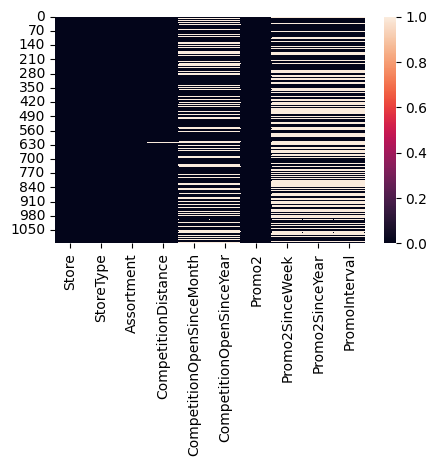

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(stores_df.isnull())

In [ ]:
stores_df.isna().any()[lambda x: x].index.tolist()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

Out of 1115 entries these are missing values for the columns:

**CompetitionDistance**- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

**CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

**CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month
Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Text(0.5, 0, 'Competition Distance Distribution Plot')

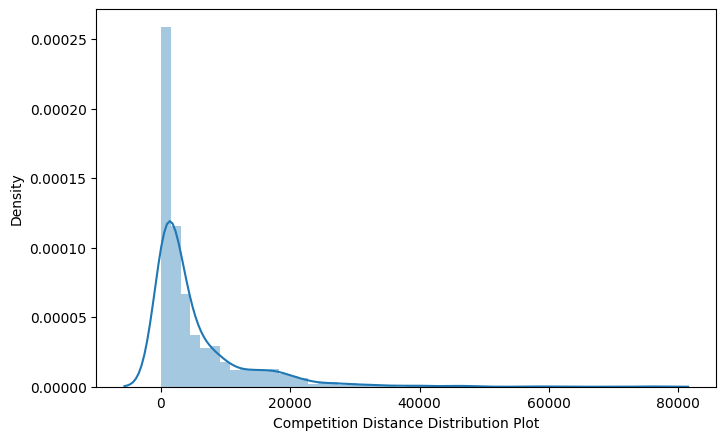

In [ ]:
# distribution plot of competition distance

sns.distplot(x=stores_df['CompetitionDistance'],hist=True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. As data is prone to outlier, We replace NaN values with Median as it is more robust to outlier effect.


In [ ]:
# Replacing NaN competition distance values with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# Create a DataFrame with null values
sdf = stores_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

# Select a random sample of the non-null values in the 'CompetitionOpenSinceMonth' column
sample = sdf['CompetitionOpenSinceMonth'].dropna().sample(sdf['CompetitionOpenSinceMonth'].isnull().sum(), random_state=42)

# Reset the index of the sample
sample = sample.reset_index(drop=True)

# Fill null values in the 'CompetitionOpenSinceMonth' column with the sample
sdf['CompetitionOpenSinceMonth'] = sdf['CompetitionOpenSinceMonth'].fillna(sample)

# Select a random sample of the non-null values in the 'CompetitionOpenSinceYear' column
sample = sdf['CompetitionOpenSinceYear'].dropna().sample(sdf['CompetitionOpenSinceYear'].isnull().sum(), random_state=42)

# Reset the index of the sample
sample = sample.reset_index(drop=True)

# Fill null values in the 'CompetitionOpenSinceYear' column with the sample
sdf['CompetitionOpenSinceYear'] = sdf['CompetitionOpenSinceYear'].fillna(sample)

# Update the stores_df DataFrame with the filled values
stores_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = sdf


In [ ]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    242
CompetitionOpenSinceYear     242
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
#The NaN values in PromoInterval, Promo2SinceYear, and Promo2SinceWeek can be replaced by 0 or 'None' depending on the dtype.

promos =['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']
for col in promos:
   if stores_df[col].dtype == np.object:
         stores_df[col].fillna('None',inplace=True)
   else:
         stores_df[col].fillna(0,inplace=True)

In [ ]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now, the stores dataset is perfectly alright without NaN values

In [ ]:
df=pd.merge(sales_df,stores_df,on='Store')

In [ ]:
# Now merge the datasets on stores data
#df = sales_df.merge(right=stores_df, on="Store", how="left")

In [ ]:
# look of first five rows pf merged data
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0          None  
1              0.0              0.0          None  
2              0.0              0.0          None  
3              0.0              0.0          None  
4              0.0              0.0          None

In [ ]:
df.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1115          6  05-01-2013   4771        339     1      0   
1017205   1115          5  04-01-2013   4540        326     1      0   
1017206   1115          4  03-01-2013   4297        300     1      0   
1017207   1115          3  02-01-2013   3697        305     1      0   
1017208   1115          2  01-01-2013      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017204            0              1         d          c               5350.0   
1017205            0              1         d          c               5350.0   
1017206            0              1         d          c               5350.0   
1017207            0              1         d          c               5350.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017204                        9.0                    2012.0       1   
1017205                        9.0                    2012.0       1   
1017206                        9.0                    2012.0       1   
1017207                        9.0                    2012.0       1   
1017208                        9.0                    2012.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1017204             22.0           2012.0  Mar,Jun,Sept,Dec  
1017205             22.0           2012.0  Mar,Jun,Sept,Dec  
1017206             22.0           2012.0  Mar,Jun,Sept,Dec  
1017207             22.0           2012.0  Mar,Jun,Sept,Dec  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec

In [ ]:
# shape of Merged data
df.shape

(1017209, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

###Checking for duplicates value###

In [ ]:
#check for duplicate data
duplicate = df.duplicated()
print(duplicate.value_counts())
df.duplicated().sum()

False    1017209
dtype: int64


0

There are no duplicates.

###Identifying continuous and categorical columns###

In [ ]:
def var(df):
    unique_list_of_col = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns]) #to get the number of unique rows
    unique_list_of_col.columns = ['names','uniques']

    cat_var = set(unique_list_of_col.names[(unique_list_of_col.uniques<=12)  | 
                                   (unique_list_of_col.names=='DayOfWeek')  | 
                                   (unique_list_of_col.names=='CompetitionOpenSinceYear')| 
                                   (unique_list_of_col.names=='Promo2SinceWeek')| 
                                   (unique_list_of_col.names=='Promo2SinceYear')| 
                                   (unique_list_of_col.names=='Store')                                
                                  ]) #if the number of unique rows is less than 12 then it is categorical variable
    total_var = set(df.columns)   #using set for distinct columns
    con_var = total_var - cat_var  #to get continuous variable
    
    return cat_var, con_var


cat_var, con_var = var(df)

print("Continuous Variables is (",len(con_var),"):\n",con_var,'\n\n'
       "Categorical Variables is (",len(cat_var),"):\n",cat_var)

Continuous Variables is ( 4 ):
 {'Sales', 'Date', 'CompetitionDistance', 'Customers'} 

Categorical Variables is ( 14 ):
 {'Promo', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'Open', 'StoreType', 'DayOfWeek', 'Promo2SinceYear', 'SchoolHoliday', 'Store', 'Assortment', 'Promo2', 'StateHoliday'}


In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in cat_var:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for Promo: [1 0]
Unique values for PromoInterval: ['None' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 1990. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 2001. 1961. 1995. 1994. 1900. 1998.]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  6.  7.  3.  5.  1.  2.]
Unique values for Open: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for SchoolHoliday: [1 0]
Unique values for Store: [   1    2    3 ... 1113 1114 1115]
Unique values for Assortment: ['a' 'c' 'b']
Unique values for Promo2: [0 1]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]


In [ ]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#creating features from the date
#df["Date"]=pd.to_datetime(df["Date"])
#df["Year"]=df["Date"].dt.year
#df["Month"]=df["Date"].dt.month
#df["Day"]=df["Date"].dt.day
#df["Week"]=df["Date"].dt.week%4
#df["WeekOfYear"]=df["Date"].dt.week
#years = df['Year'].unique()

In [ ]:
#years

In [ ]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0          None  
1              0.0              0.0          None  
2              0.0              0.0          None  
3              0.0              0.0          None  
4              0.0              0.0          None

In [ ]:
len(df[df.duplicated()])

0

###Checking for the outliers###

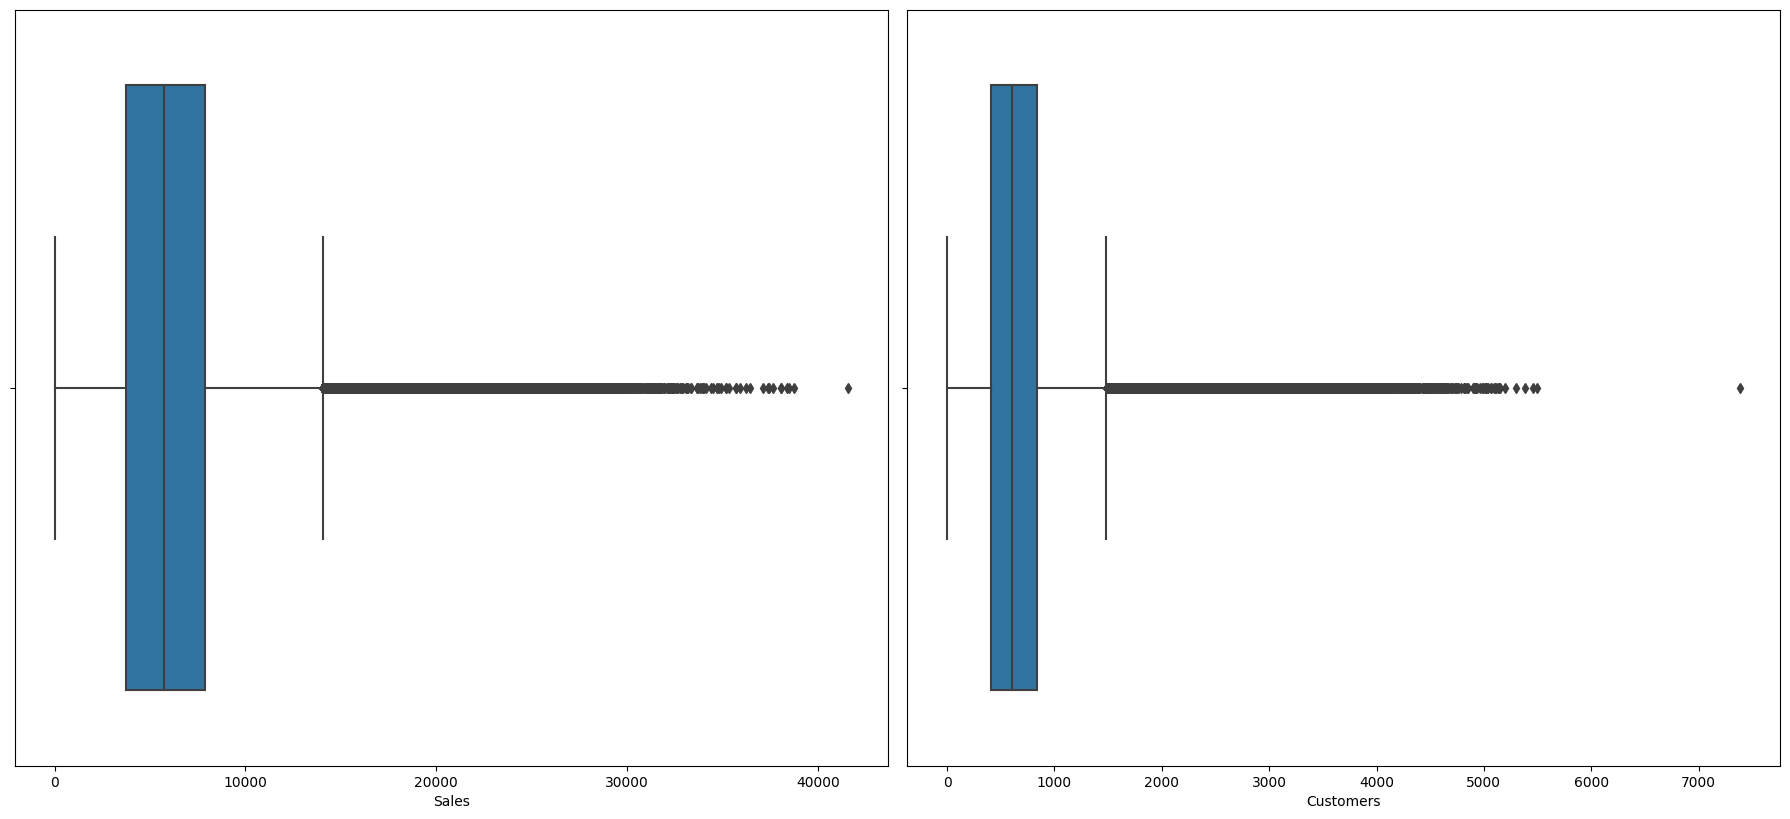

In [ ]:
features = ['Sales', 'Customers']
n = 1
plt.figure(figsize=(18,16))
for feature in features:
    plt.subplot(2,2,n)
    sns.boxplot(df[feature])
    n+=1
    plt.tight_layout()

In [ ]:
class OutlierRemover:
    def remove_outliers(self, df, column_name):
        # Calculate the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.15 * IQR
        upper_bound = Q3 + 4 * IQR

        # Identify outliers
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

        # Remove the outliers
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

        return df

In [ ]:
# Remove the outliers
outlier_remover = OutlierRemover()
df = outlier_remover.remove_outliers(df, 'Sales')
df = outlier_remover.remove_outliers(df, 'Customers')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009953 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1009953 non-null  int64  
 1   DayOfWeek                  1009953 non-null  int64  
 2   Date                       1009953 non-null  object 
 3   Sales                      1009953 non-null  int64  
 4   Customers                  1009953 non-null  int64  
 5   Open                       1009953 non-null  int64  
 6   Promo                      1009953 non-null  int64  
 7   StateHoliday               1009953 non-null  object 
 8   SchoolHoliday              1009953 non-null  int64  
 9   StoreType                  1009953 non-null  object 
 10  Assortment                 1009953 non-null  object 
 11  CompetitionDistance        1009953 non-null  float64
 12  CompetitionOpenSinceMonth  1009953 non-null  float64
 13  CompetitionO

#**Exploratory Data Analysis**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

##**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
Customers would have a positive correlation with Sales.
The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
Promotion should be having a positive correlation with Sales.
Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
Stores are influenced by seasonality, probably before holidays sales would be high.
Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

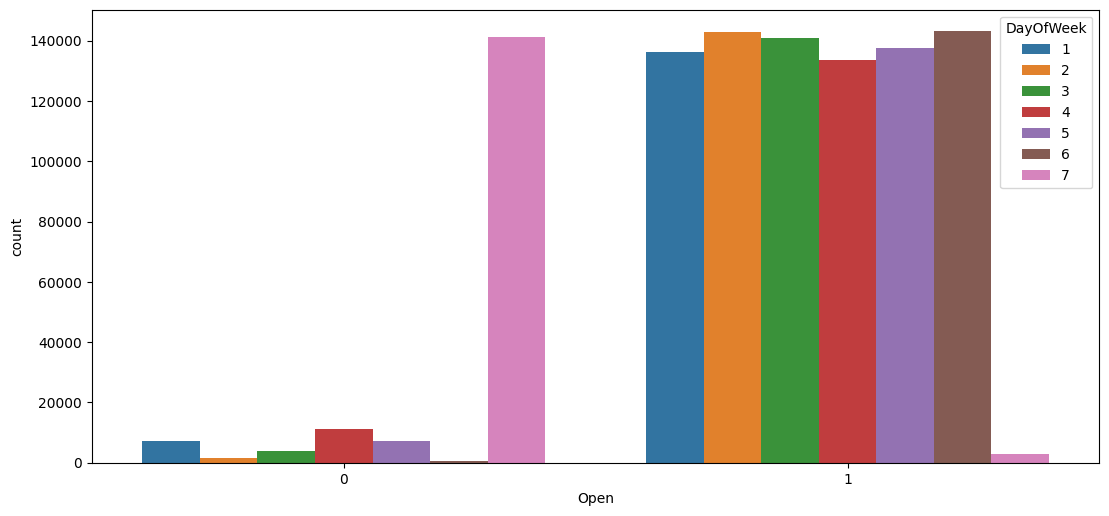

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x='Open',hue='DayOfWeek', data=df)
plt.show()

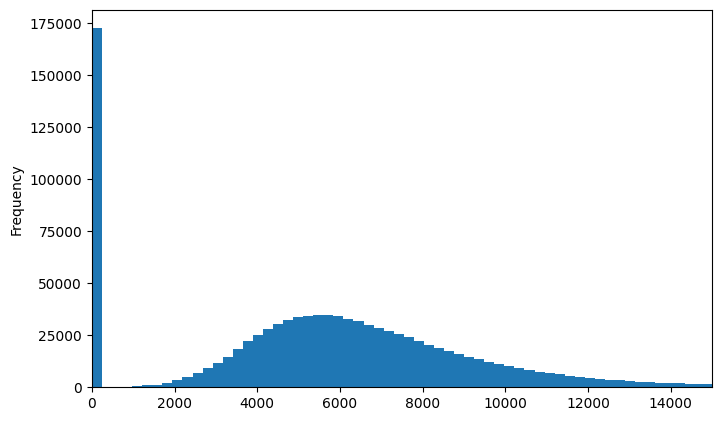

In [ ]:
df["Sales"].plot(kind='hist',bins=100,xlim=(0,15000))
plt.show()

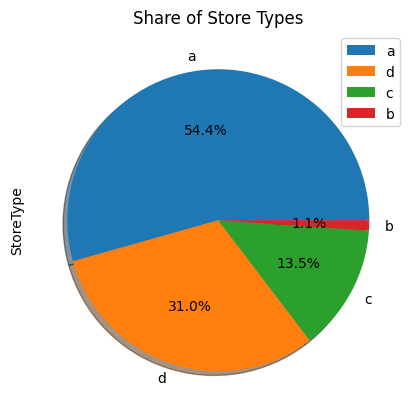

In [ ]:
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

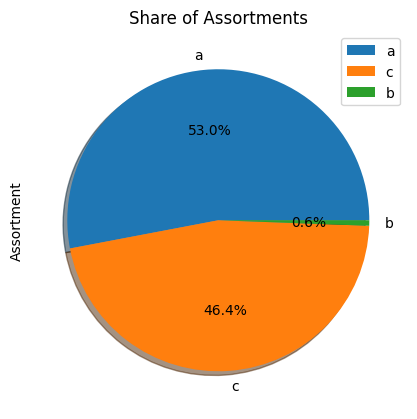

In [ ]:
df["Assortment"].value_counts().plot.pie(title='Share of Assortments', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
print('Open:\n', df['Open'].value_counts(), '\n\n')
print('Promo\n', df['Promo'].value_counts(), '\n\n')
print('State Holiday\n', df['StateHoliday'].value_counts(), '\n\n')
print('School Holiday\n', df['SchoolHoliday'].value_counts())

Open:
 1    837136
0    172817
Name: Open, dtype: int64 


Promo
 0    625342
1    384611
Name: Promo, dtype: int64 


State Holiday
 0    979038
a     20168
b      6656
c      4091
Name: StateHoliday, dtype: int64 


School Holiday
 0    829589
1    180364
Name: SchoolHoliday, dtype: int64


In [ ]:
store_sales_df=df.groupby('Store')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
store_sales_df

Store     Sales
787     788  13227077
512     513  12770854
382     383  12174898
697     698  12011780
522     523  11951964
...     ...       ...
768     769   1100252
561     562    691075
1113   1114    620580
261     262    132773
732     733    119929

[1115 rows x 2 columns]

#**Categorical Features:**

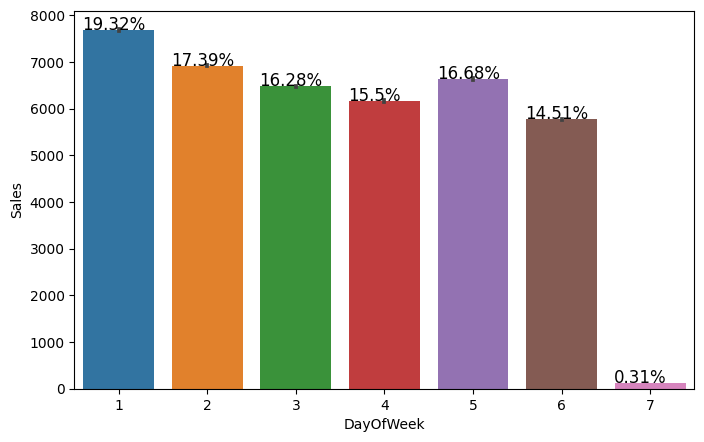

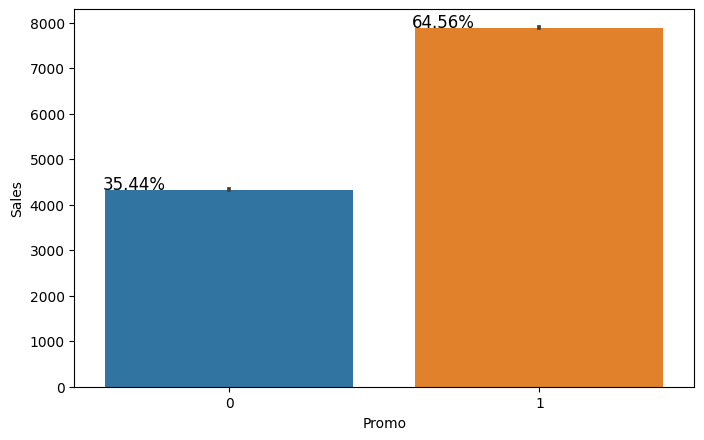

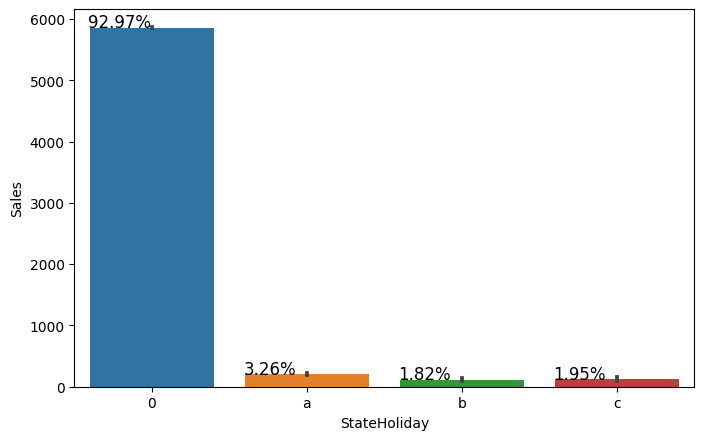

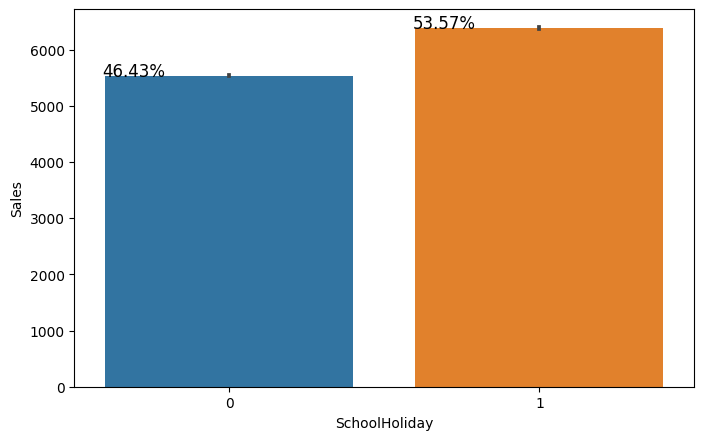

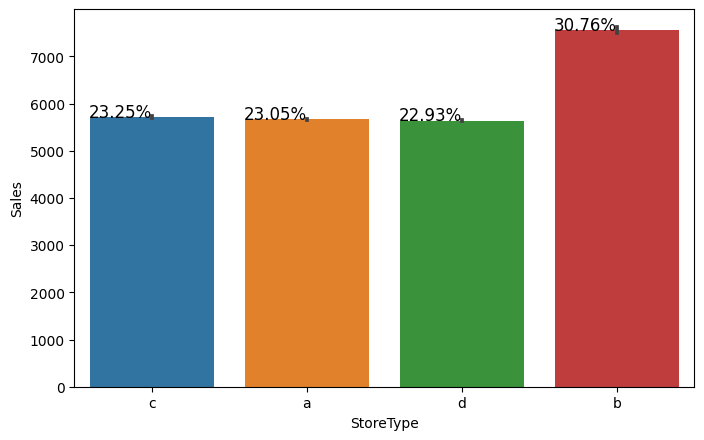

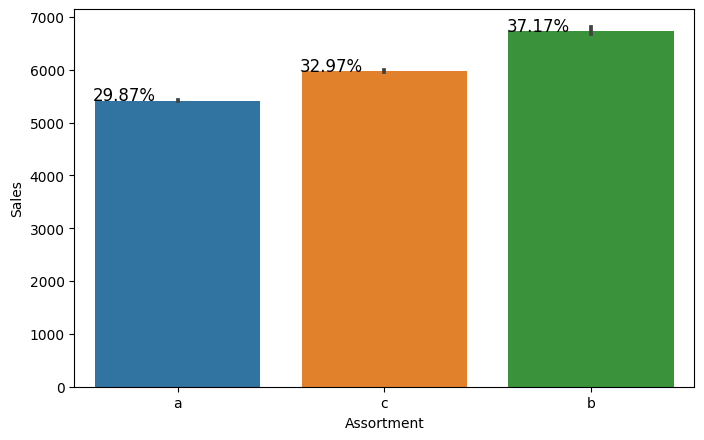

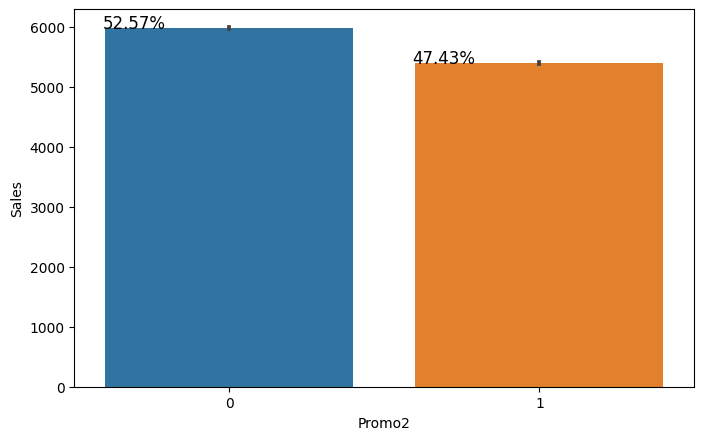

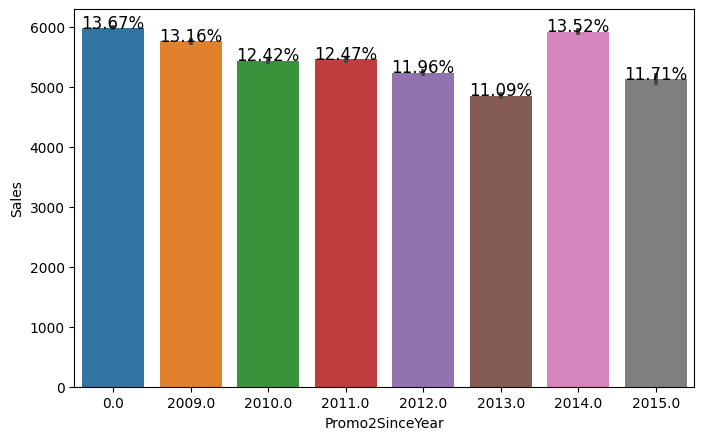

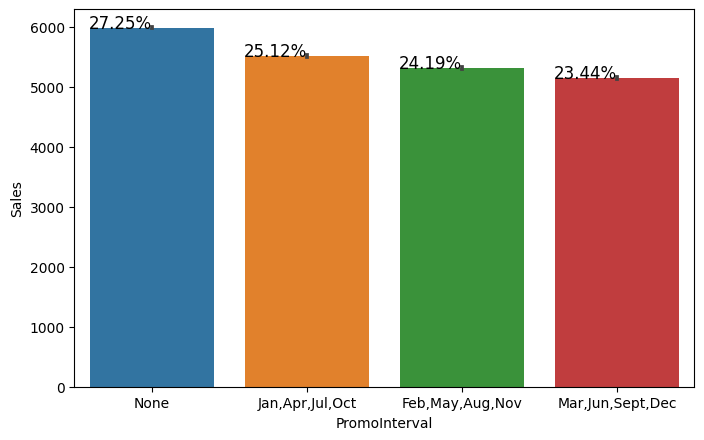

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                          'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##**Observation:**
*   There were more sales on Monday, probably because shops generally remain closed 
on Sundays.

*   It could be seen that the Promo leads to more sales.

*   Normally all stores, with few exceptions, are closed on state holidays. 

*   Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.

*   More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

*   On an average Store type B had the highest sales.

*  Highest average sales were seen with Assortment levels-b which is 'extra'.

*  With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

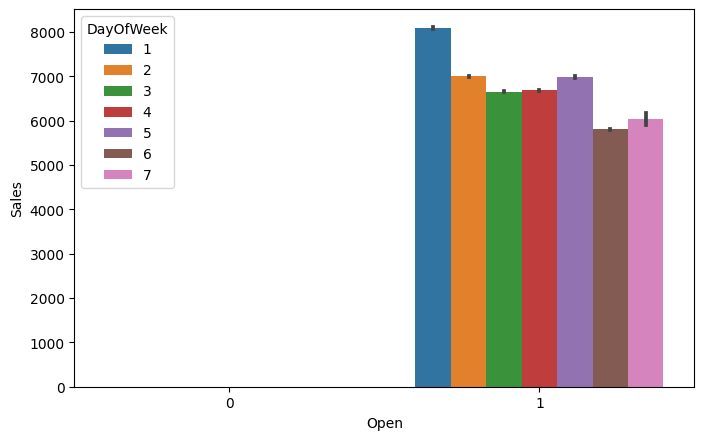

In [ ]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

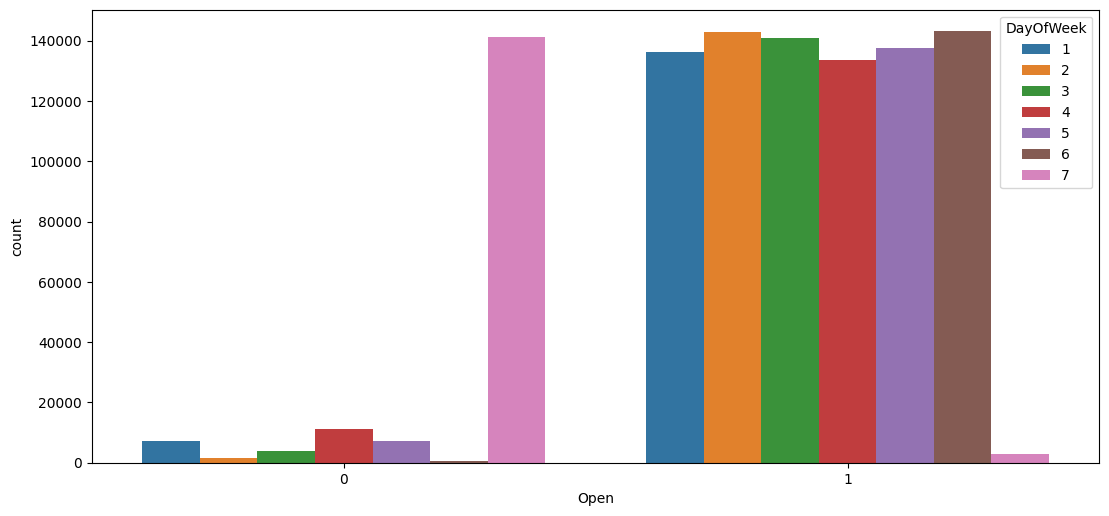

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x='Open',hue='DayOfWeek', data=df)
plt.show()

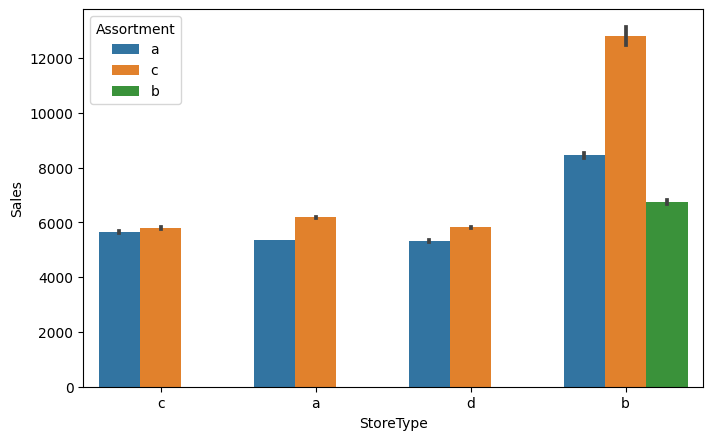

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

##**Observation:**
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [ ]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

StoreType       Sales  Customers
0         a  3111260812  356018941
3         d  1763450838  156795591
2         c   781537813   91951516
1         b    84398621   16580985

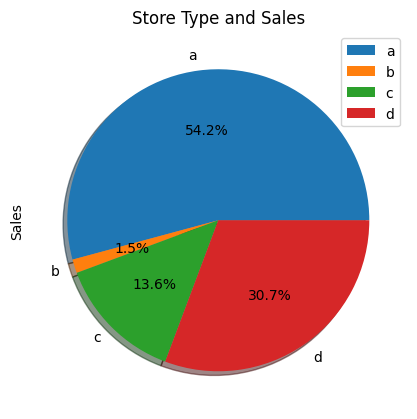

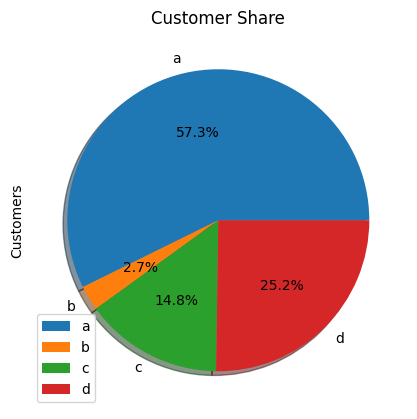

In [ ]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##**Observation:**
*  A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

*  But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

*  Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

# Continuous Features:


##Sales with Time


In [ ]:
# Define a function to extract the month, day, and year from a date string
def extract_date_parts(date_str):
    # Split the date string using the '-' character as the delimiter
    date_parts = date_str.split('-')
    
    # Extract the month, day, and year from the date parts
    month = int(date_parts[1])
    day = int(date_parts[0])
    year = int(date_parts[2])
    
    # Return the extracted month, day, and year as a tuple
    return month, day, year

# Use the apply() function to apply the extract_date_parts() function to the 'Date' column
date_parts = df['Date'].apply(extract_date_parts)

# Extract the month, day, and year from the date_parts Series and add them as columns to the DataFrame
df['Month'], df['Day'], df['Year'] = zip(*date_parts)

In [ ]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType  ... CompetitionDistance  \
0              1         c  ...              1270.0   
1              1         c  ...              1270.0   
2              1         c  ...              1270.0   
3              1         c  ...              1270.0   
4              1         c  ...              1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval Month  Day  Year  
0              0.0              0.0           None     7   31  2015  
1              0.0              0.0           None     7   30  2015  
2              0.0              0.0           None     7   29  2015  
3              0.0              0.0           None     7   28  2015  
4              0.0              0.0           None     7   27  2015  

[5 rows x 21 columns]

In [ ]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      1          4  30-07-2015   5020        546     1      1            0   
2      1          3  29-07-2015   4782        523     1      1            0   
3      1          2  28-07-2015   5011        560     1      1            0   
4      1          1  27-07-2015   6102        612     1      1            0   

   SchoolHoliday StoreType  ... CompetitionDistance  \
0              1         c  ...              1270.0   
1              1         c  ...              1270.0   
2              1         c  ...              1270.0   
3              1         c  ...              1270.0   
4              1         c  ...              1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval Month  Day  Year  
0              0.0              0.0           None     7   31  2015  
1              0.0              0.0           None     7   30  2015  
2              0.0              0.0           None     7   29  2015  
3              0.0              0.0           None     7   28  2015  
4              0.0              0.0           None     7   27  2015  

[5 rows x 21 columns]

In [ ]:
def plotter(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=StringA, y=StringB, data=df ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=df ,hue="DayOfWeek", ax=axes[1])

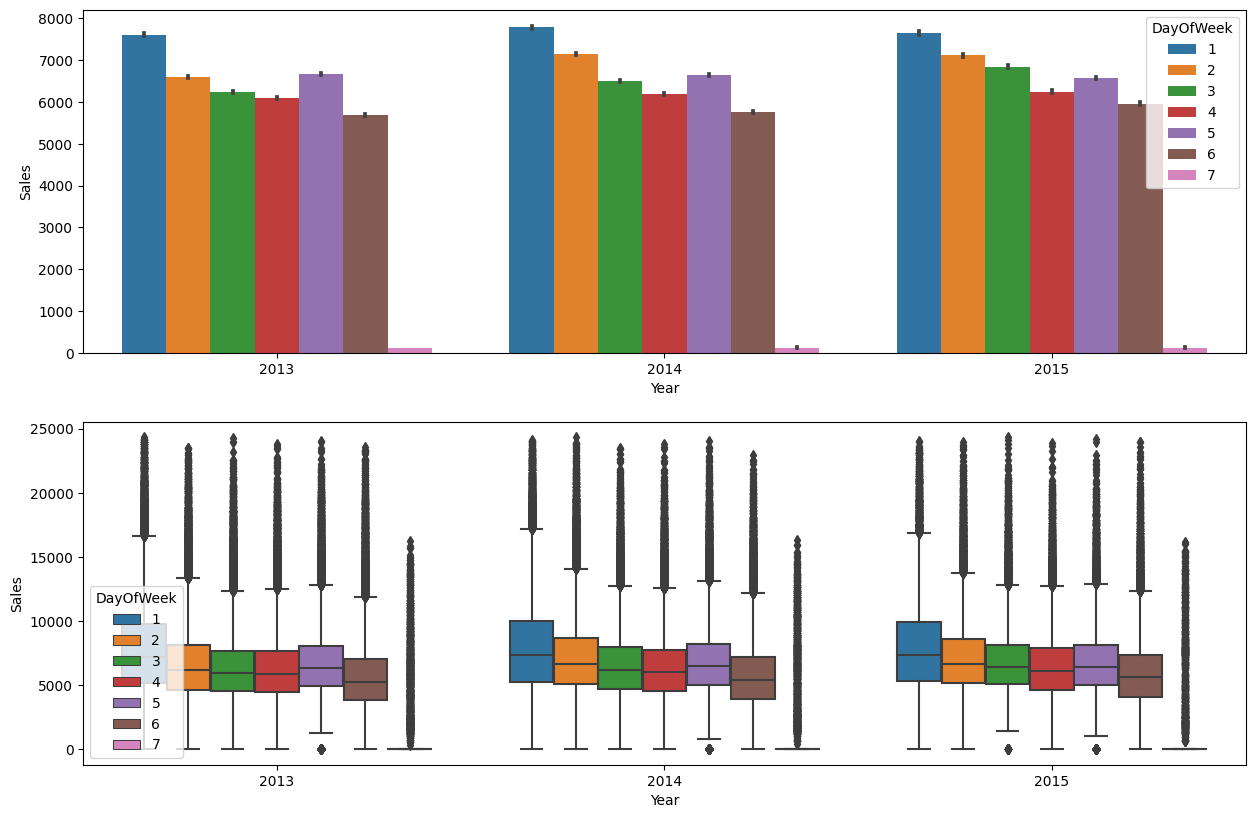

In [ ]:
plotter('Year','Sales')

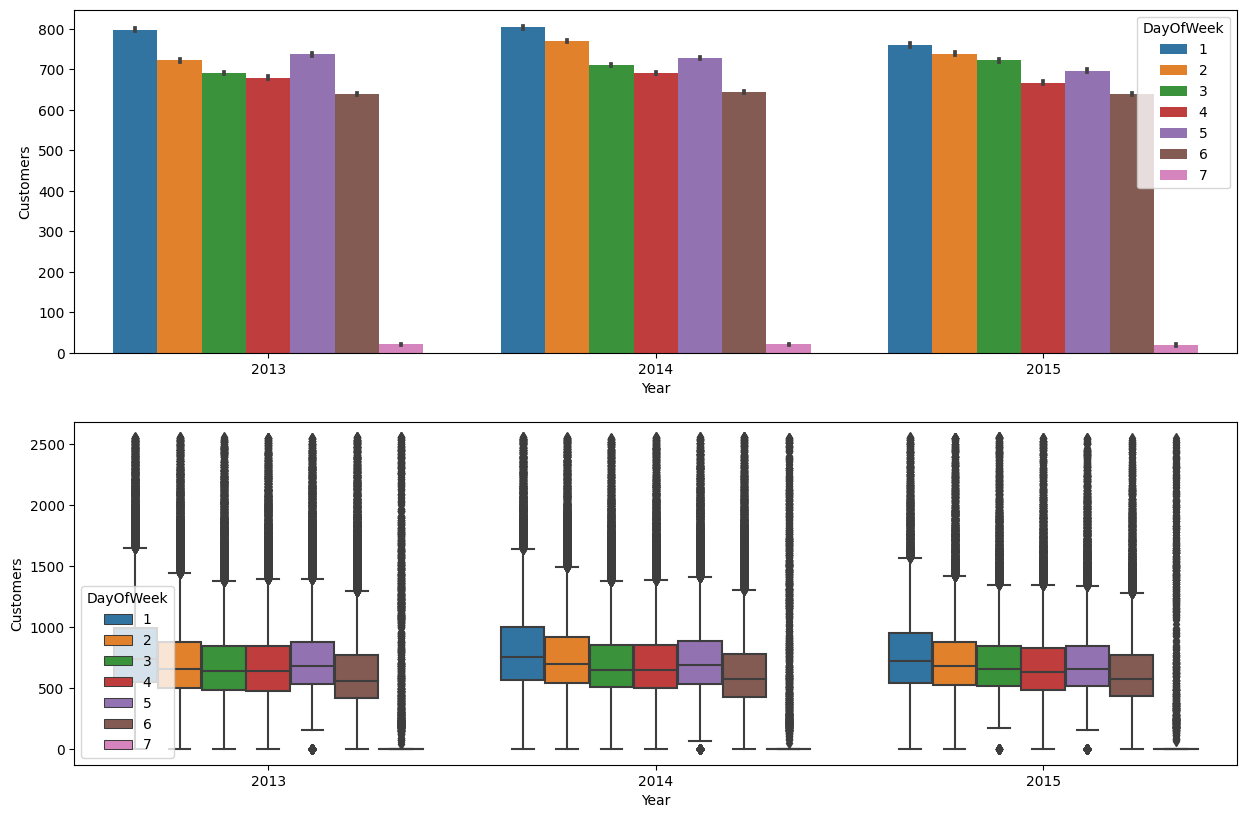

In [ ]:
plotter("Year","Customers")

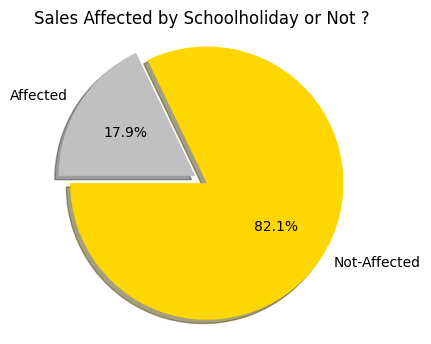

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

In [ ]:
def plotnew(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(12, 15)
  sns.barplot(x=StringA, y=StringB, data=df ,hue="StoreType", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=df ,hue="StoreType", ax=axes[1])

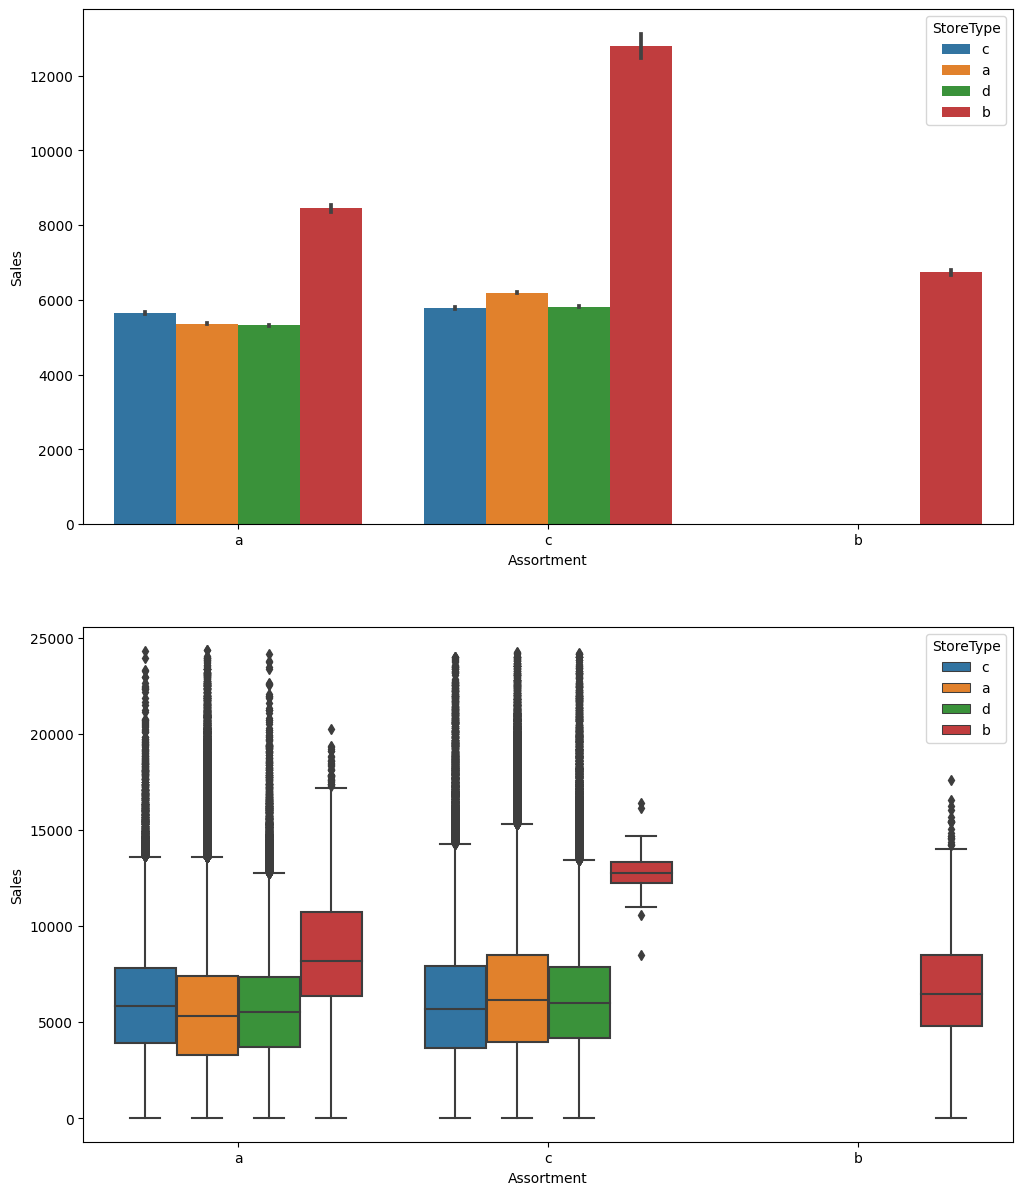

In [ ]:
plotnew("Assortment" , "Sales")

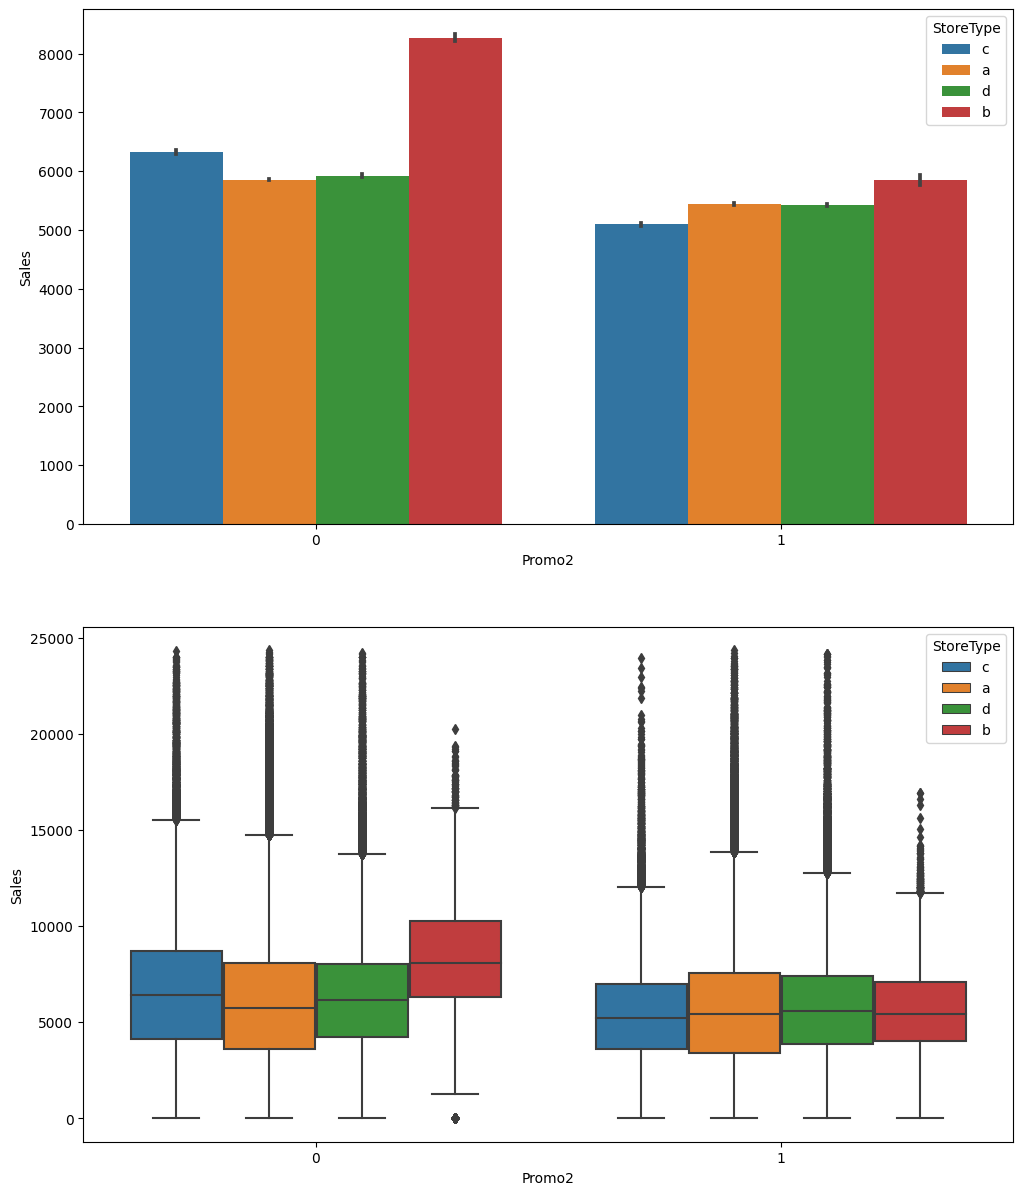

In [ ]:
plotnew("Promo2" , "Sales")

Stores which were open on Day 7

In [ ]:
df[(df.Open == 1) & (df.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  274,  299,  310,  335,  353,  423,  433,
        453,  494,  512,  524,  530,  578,  676,  682,  732,  733,  769,
        863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

In [ ]:
#Let's define our numerical, categorical and target variables
numerical_features= [feat for feat in df.describe(include=np.number).columns if feat not in['Sales']]
categorical_features =[feat for feat in df.describe(exclude=np.number).columns if feat not in['Date']] #Omitting date here since we have stored it as year, month and day in 3 seperate columns
target_variable=['Sales']

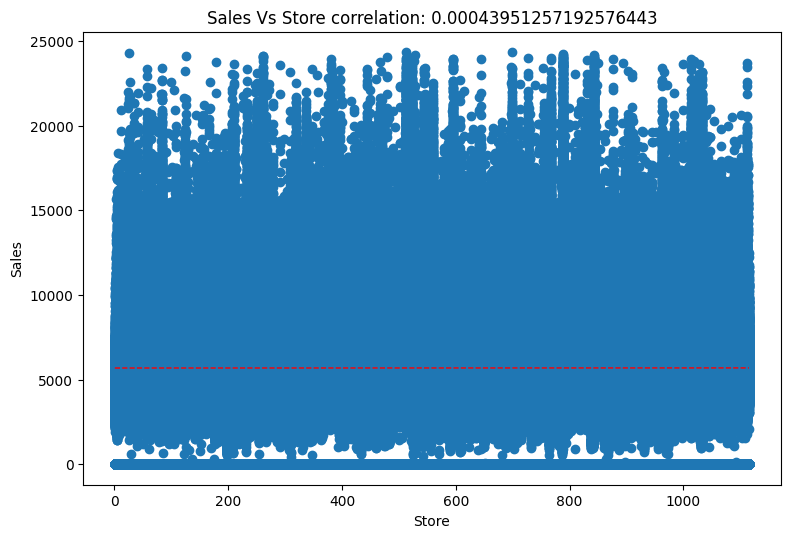

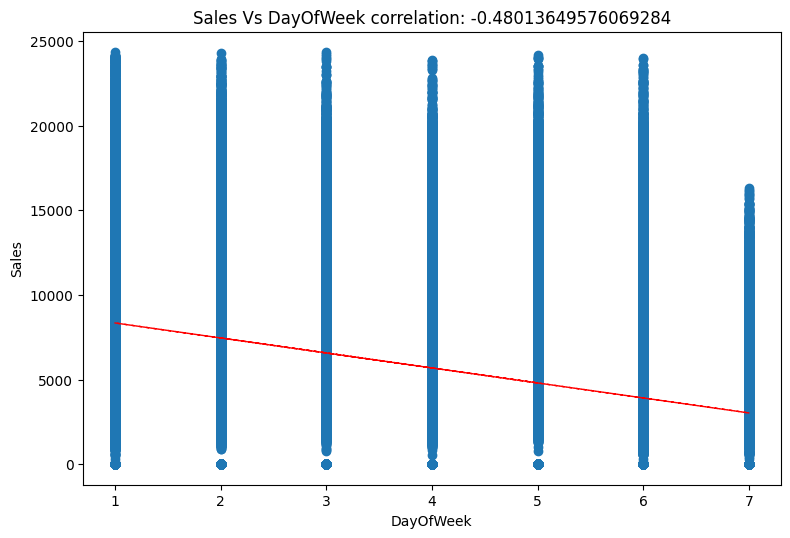

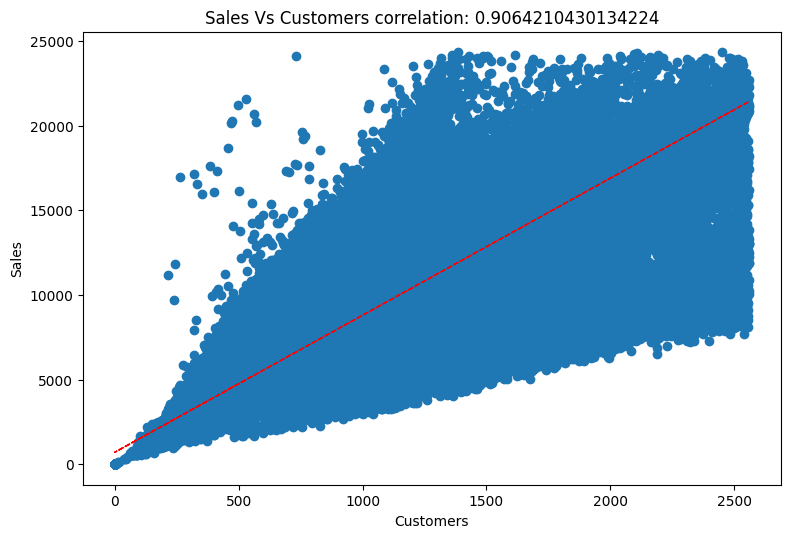

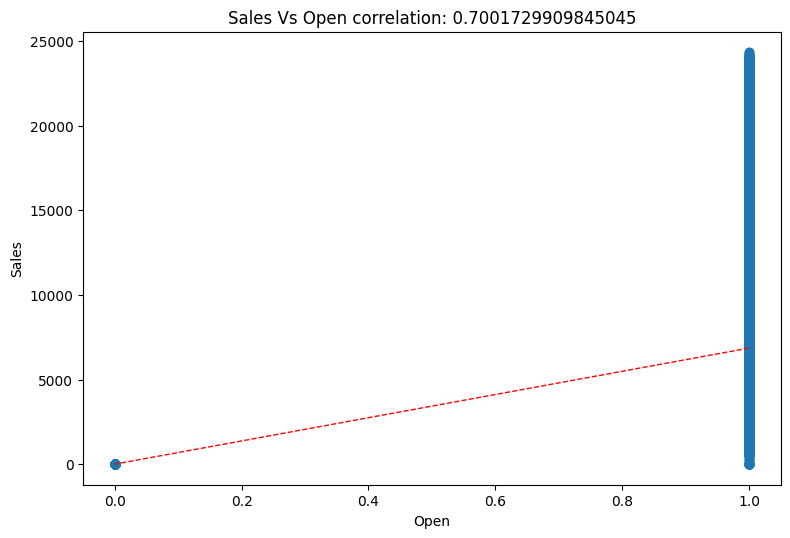

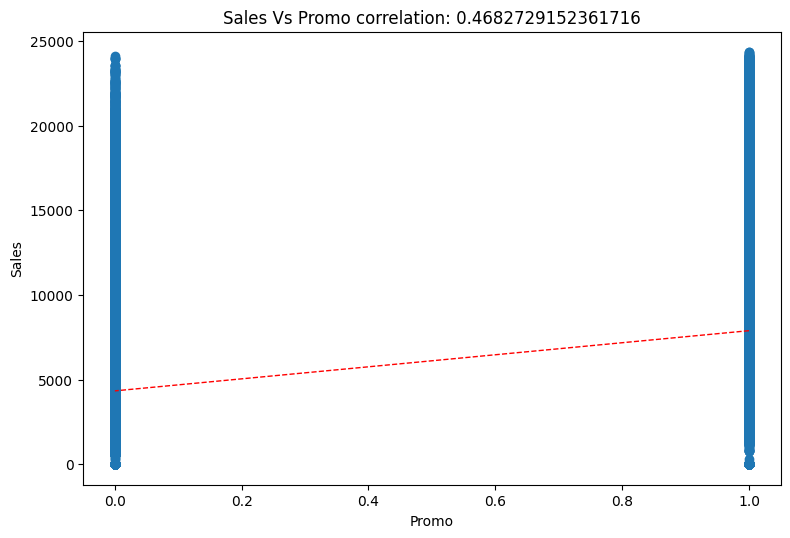

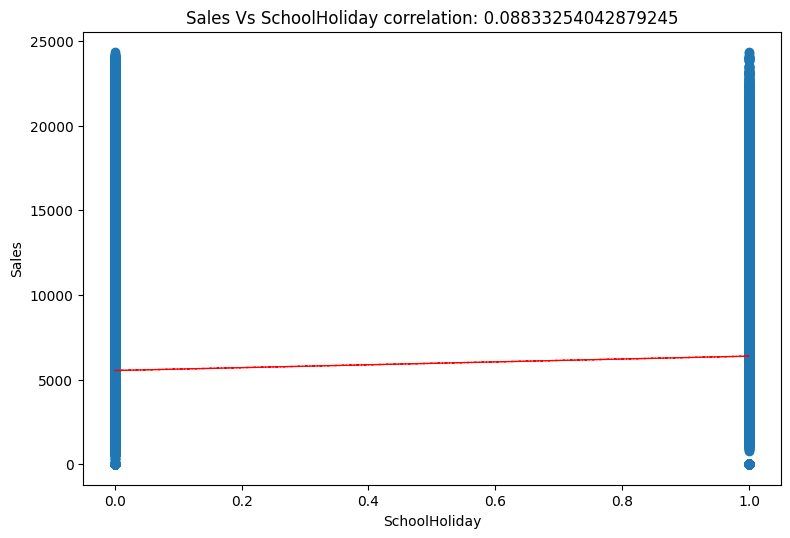

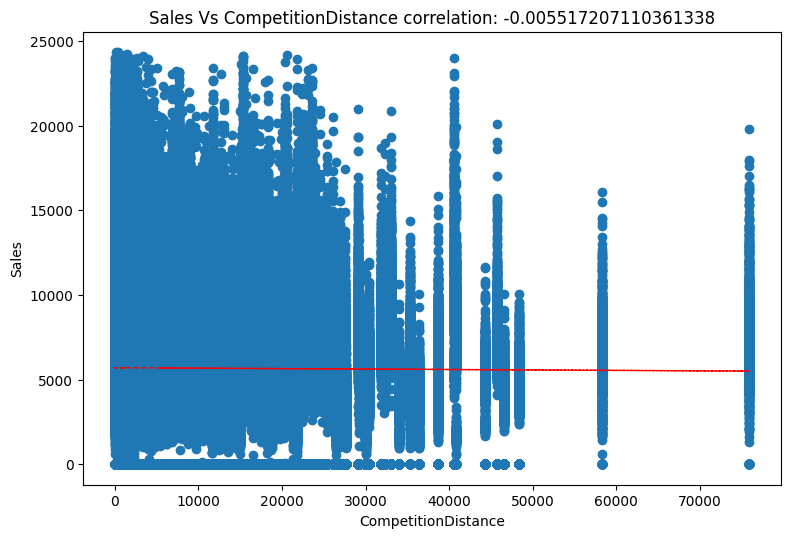

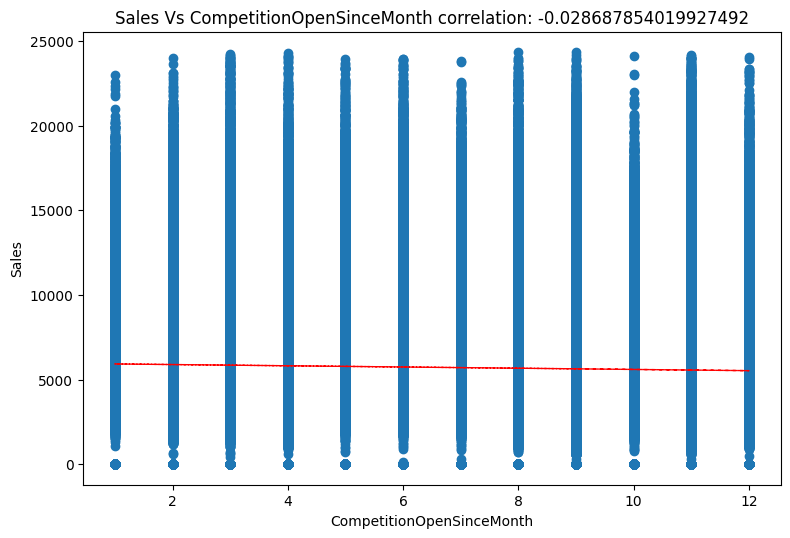

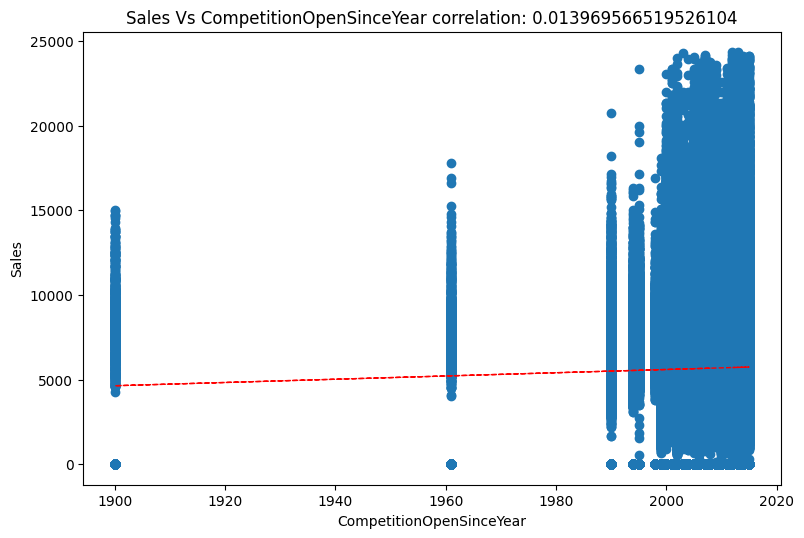

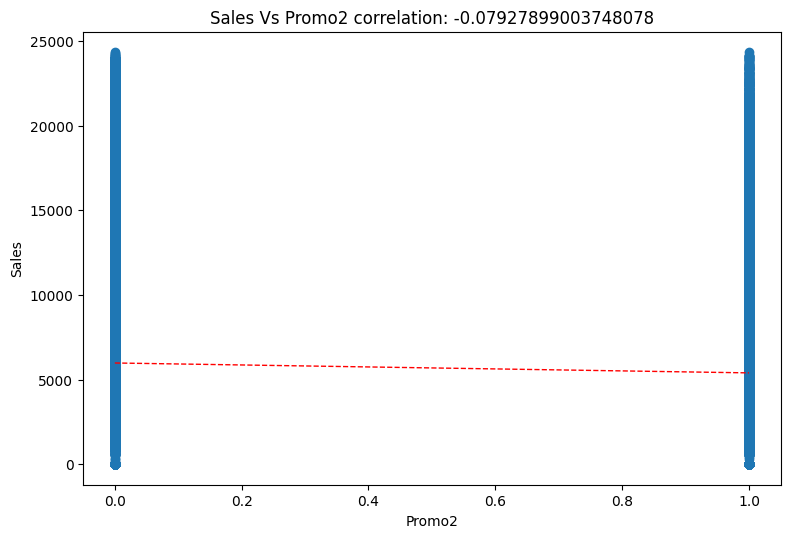

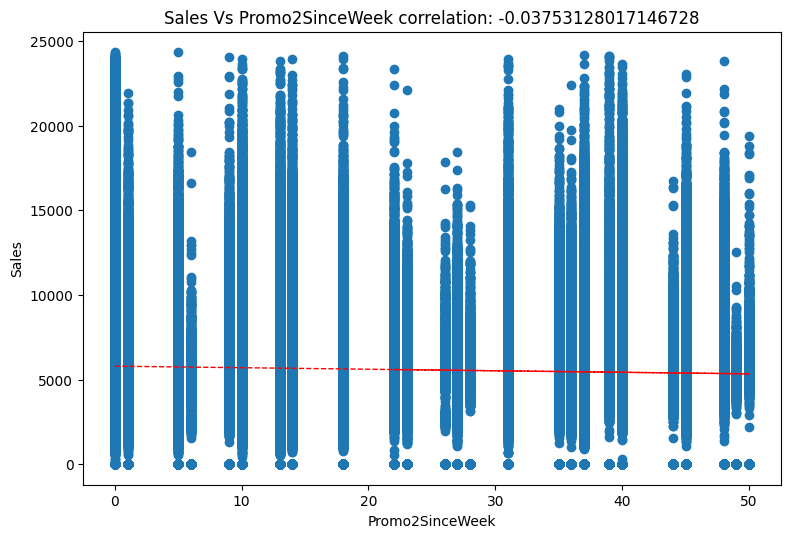

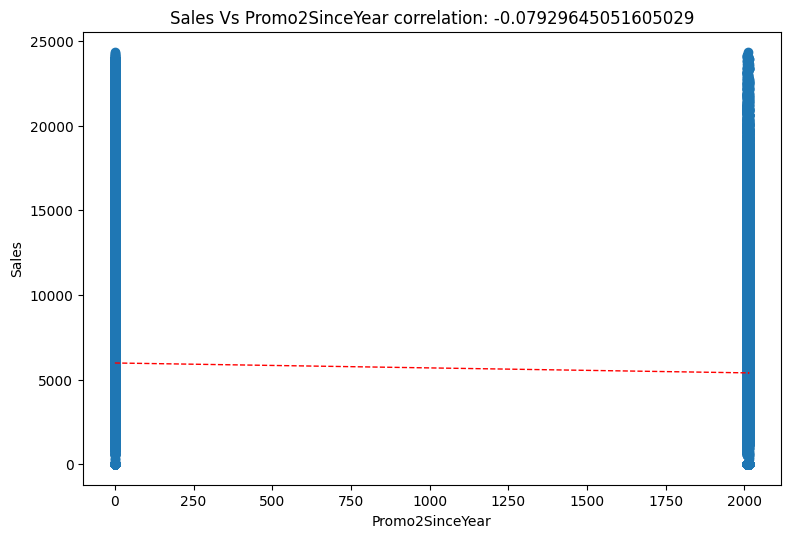

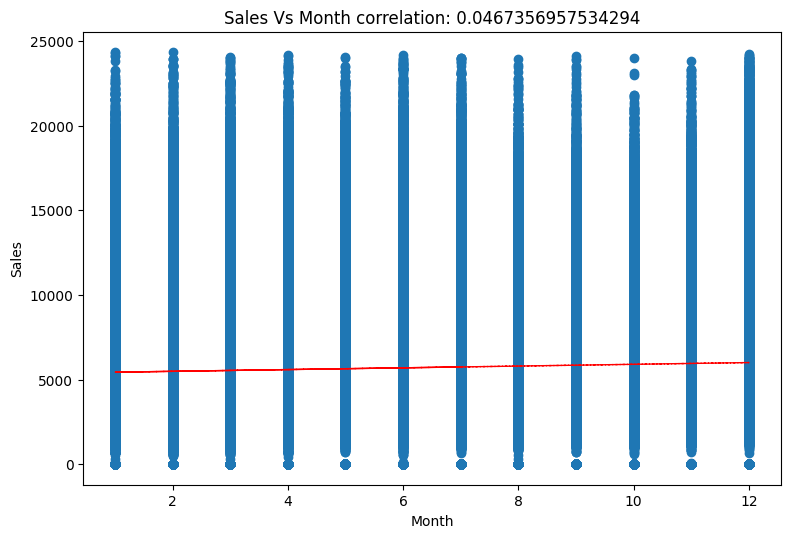

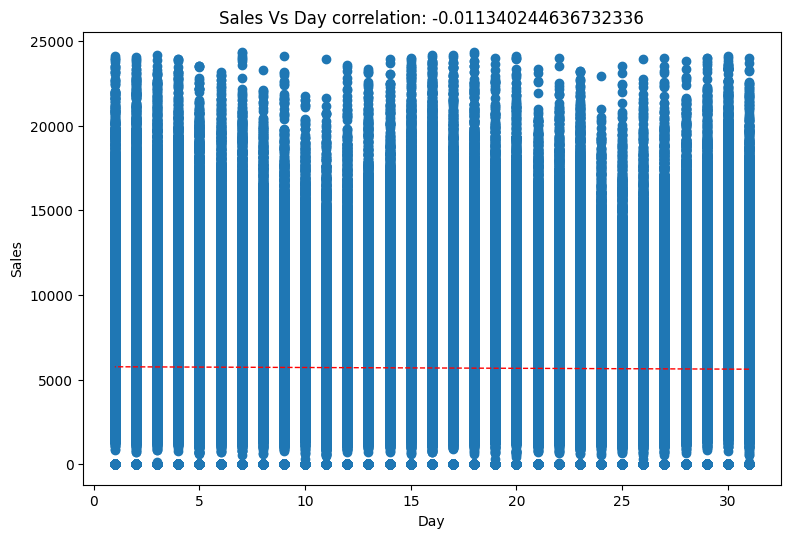

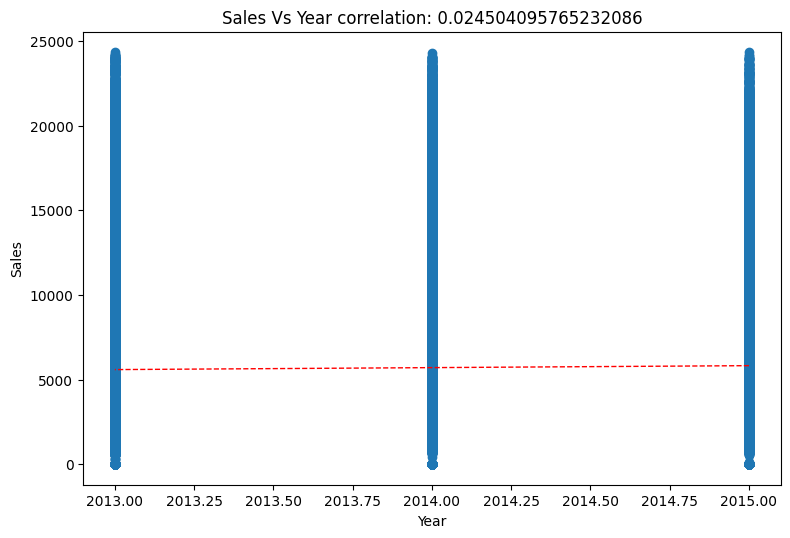

In [ ]:
for col in numerical_features:
  if col not in ['Date','StateHoliday','Sales']:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=df[col]
    label=df['Sales']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(df[col])

    plt.plot(df[col],y_hat,"r--",lw=1)

  plt.show()


<Figure size 900x600 with 0 Axes>

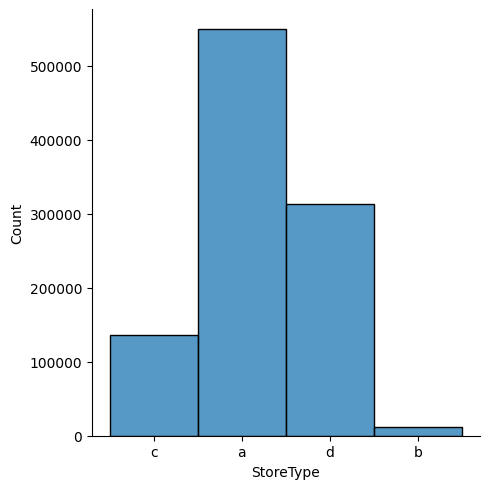

<Figure size 900x600 with 0 Axes>

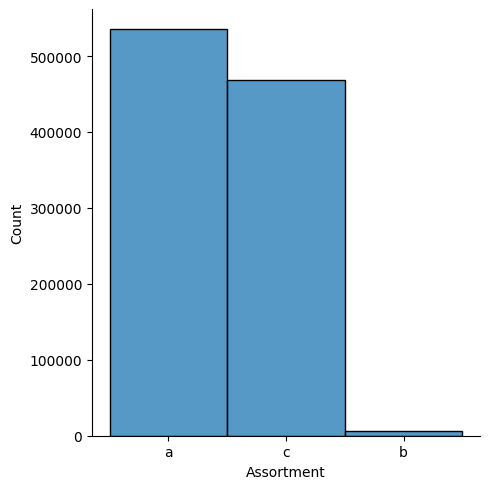

<Figure size 900x600 with 0 Axes>

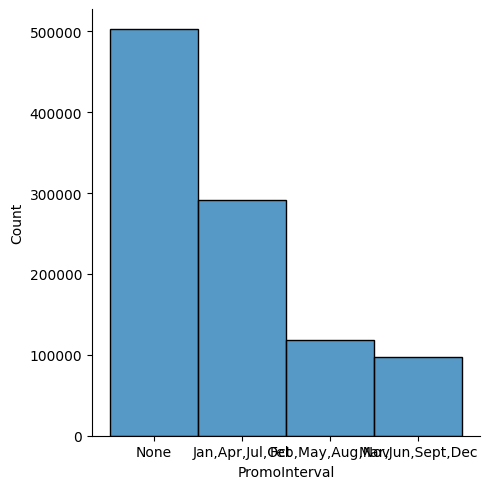

In [ ]:
for col in categorical_features:
  if col not in ['StateHoliday']:
    plt.figure(figsize=(9,6))
    sns.displot(x=df[col])

In [ ]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [ ]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

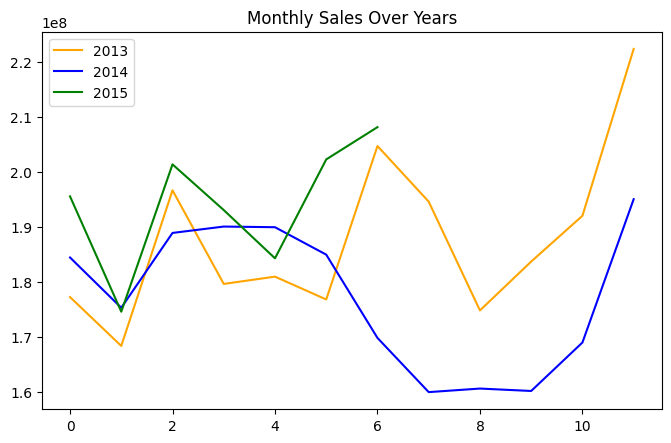

In [ ]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

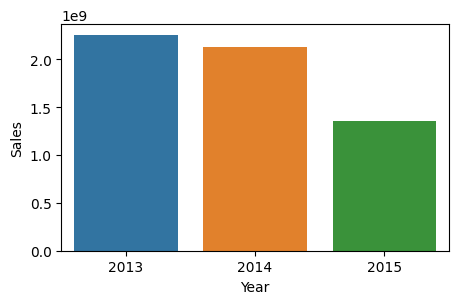

In [ ]:
sale_year_timeline=df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(5,3))
sns.barplot(sale_year_timeline.Year,sale_year_timeline.Sales)

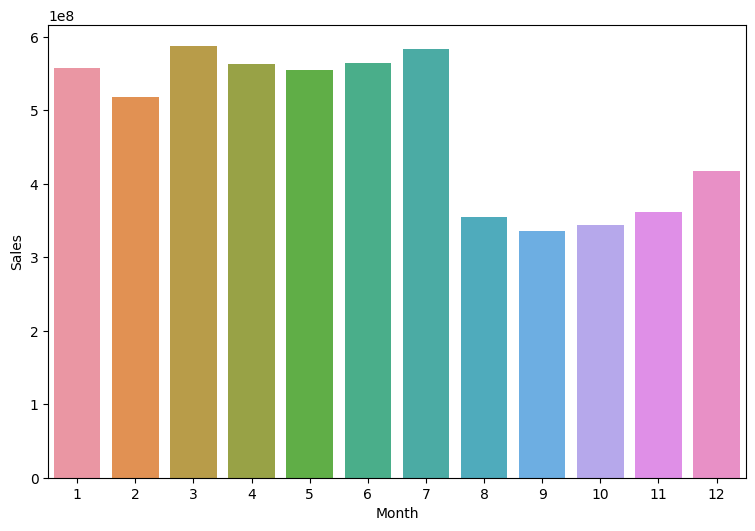

In [ ]:
sales_by_month=df.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(sales_by_month.Month,sales_by_month.Sales)
plt.show()

In [ ]:
#Creating dataframes grouped by month for each year.
Sales_2013=df[df.Year==2013].groupby('Month')['Sales'].sum().reset_index()
Sales_2014=df[df.Year==2014].groupby('Month')['Sales'].sum().reset_index()
Sales_2015=df[df.Year==2015].groupby('Month')['Sales'].sum().reset_index()

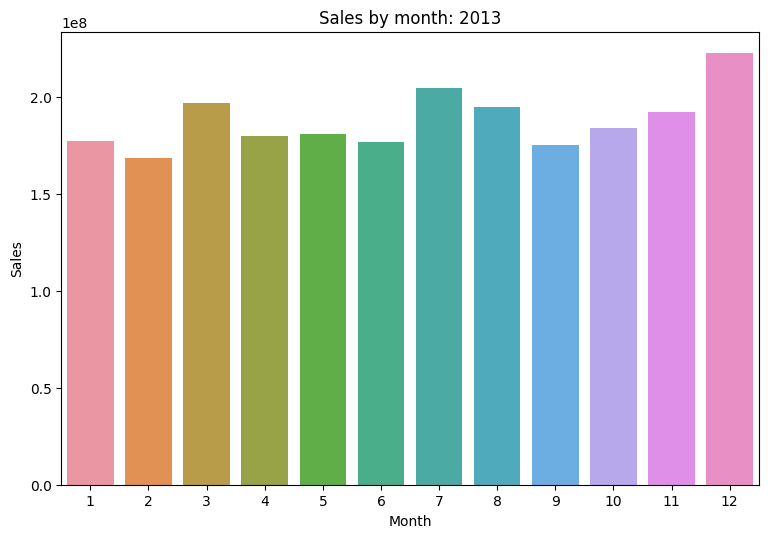

In [ ]:
#2013 sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2013.Month,Sales_2013.Sales)
plt.title('Sales by month: 2013')
plt.show()

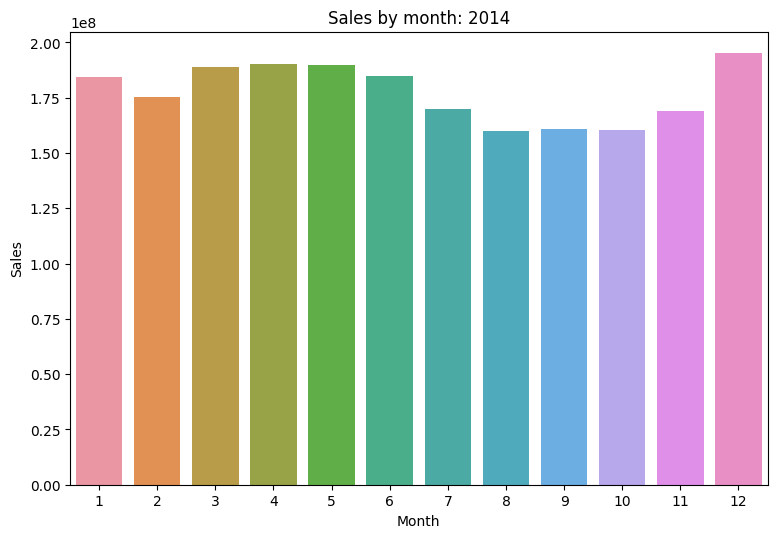

In [ ]:
#2014 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2014.Month,Sales_2014.Sales)
plt.title('Sales by month: 2014')
plt.show()

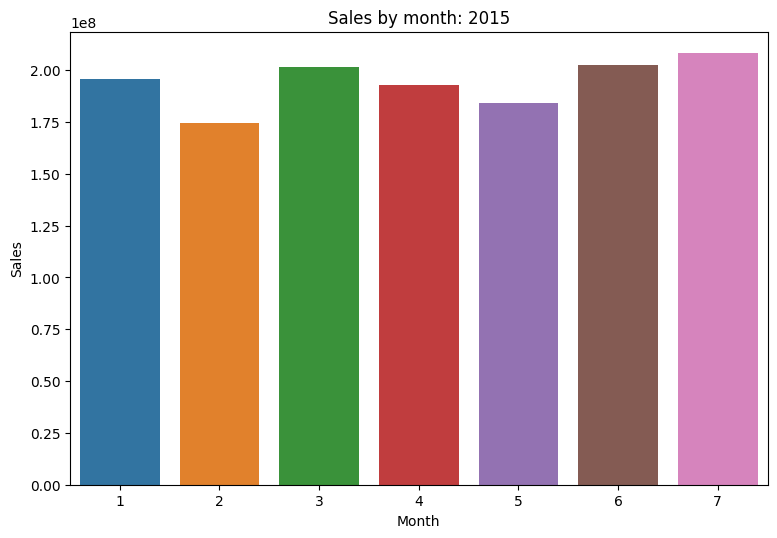

In [ ]:
#2015 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2015.Month,Sales_2015.Sales)
plt.title('Sales by month: 2015')
plt.show()

**Remarks**
So as opposed to our previous conclusions, we can observe that the month of december has recorded highest sales in the year 2013, and 2014. 
The reason that the cumulative sales went down is that we don't have data from Aug 2015 to Dec 2015. 
So we can safely assume that the sales generally tend to grow towards the year end. 

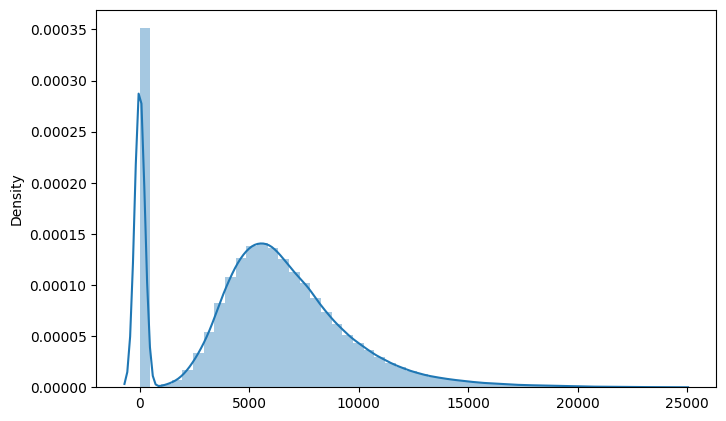

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

###**Observation:**
The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

#**Correlation Matrix**
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [ ]:
#creating copy of dataset before removing outliers
df1=df.copy()
df1.shape

(1009953, 21)

In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'Day','DayOfWeek' , 'Month']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

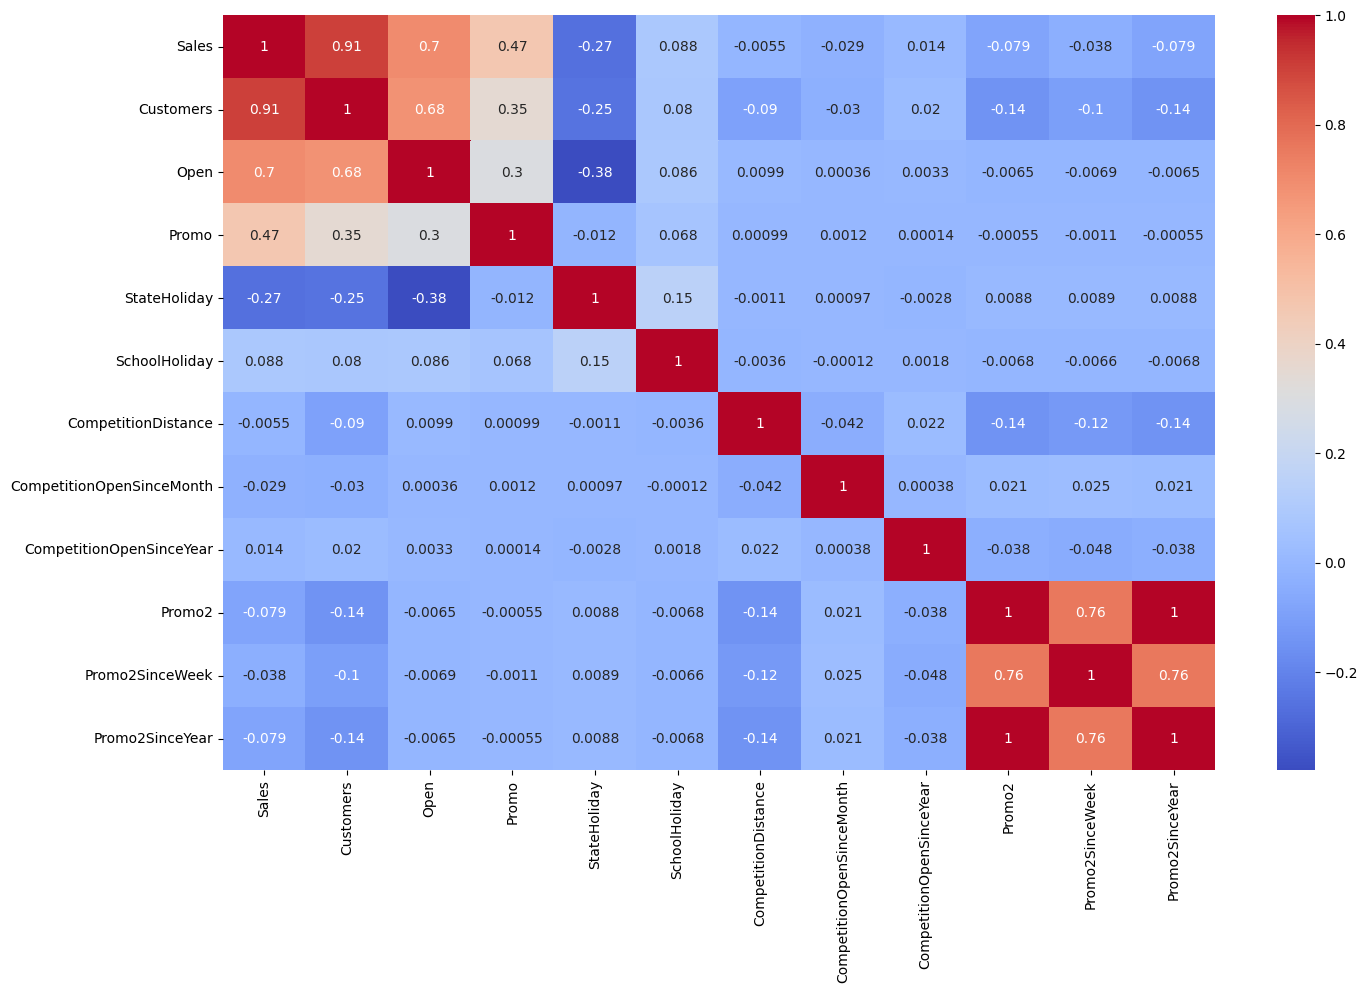

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

###**Observation:**
Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

##Categorical Features Encoding



In [ ]:
# One hot encoding
df1 = pd.get_dummies(df1, columns=['StateHoliday','StoreType','Assortment','PromoInterval'], prefix=["StateH", "S_Type","Assortment","PromoInterval"])
df1.T

0           1           2        \
Store                                    1           1           1   
DayOfWeek                                5           4           3   
Date                            31-07-2015  30-07-2015  29-07-2015   
Sales                                 5263        5020        4782   
Customers                              555         546         523   
Open                                     1           1           1   
Promo                                    1           1           1   
SchoolHoliday                            1           1           1   
CompetitionDistance                 1270.0      1270.0      1270.0   
CompetitionOpenSinceMonth              9.0         9.0         9.0   
CompetitionOpenSinceYear            2008.0      2008.0      2008.0   
Promo2                                   0           0           0   
Promo2SinceWeek                        0.0         0.0         0.0   
Promo2SinceYear                        0.0         0.0         0.0   
Month                                    7           7           7   
Day                                     31          30          29   
Year                                  2015        2015        2015   
StateH_0                                 1           1           1   
StateH_a                                 0           0           0   
StateH_b                                 0           0           0   
StateH_c                                 0           0           0   
S_Type_a                                 0           0           0   
S_Type_b                                 0           0           0   
S_Type_c                                 1           1           1   
S_Type_d                                 0           0           0   
Assortment_a                             1           1           1   
Assortment_b                             0           0           0   
Assortment_c                             0           0           0   
PromoInterval_Feb,May,Aug,Nov            0           0           0   
PromoInterval_Jan,Apr,Jul,Oct            0           0           0   
PromoInterval_Mar,Jun,Sept,Dec           0           0           0   
PromoInterval_None                       1           1           1   

                                   3           4           5        \
Store                                    1           1           1   
DayOfWeek                                2           1           7   
Date                            28-07-2015  27-07-2015  26-07-2015   
Sales                                 5011        6102           0   
Customers                              560         612           0   
Open                                     1           1           0   
Promo                                    1           1           0   
SchoolHoliday                            1           1           0   
CompetitionDistance                 1270.0      1270.0      1270.0   
CompetitionOpenSinceMonth              9.0         9.0         9.0   
CompetitionOpenSinceYear            2008.0      2008.0      2008.0   
Promo2                                   0           0           0   
Promo2SinceWeek                        0.0         0.0         0.0   
Promo2SinceYear                        0.0         0.0         0.0   
Month                                    7           7           7   
Day                                     28          27          26   
Year                                  2015        2015        2015   
StateH_0                                 1           1           1   
StateH_a                                 0           0           0   
StateH_b                                 0           0           0   
StateH_c                                 0           0           0   
S_Type_a                                 0           0           0   
S_Type_b                                 0           0           0   
S_Type_c                                 1  

##Feature Selection

Let's look into multicolinearity in the dataset. 

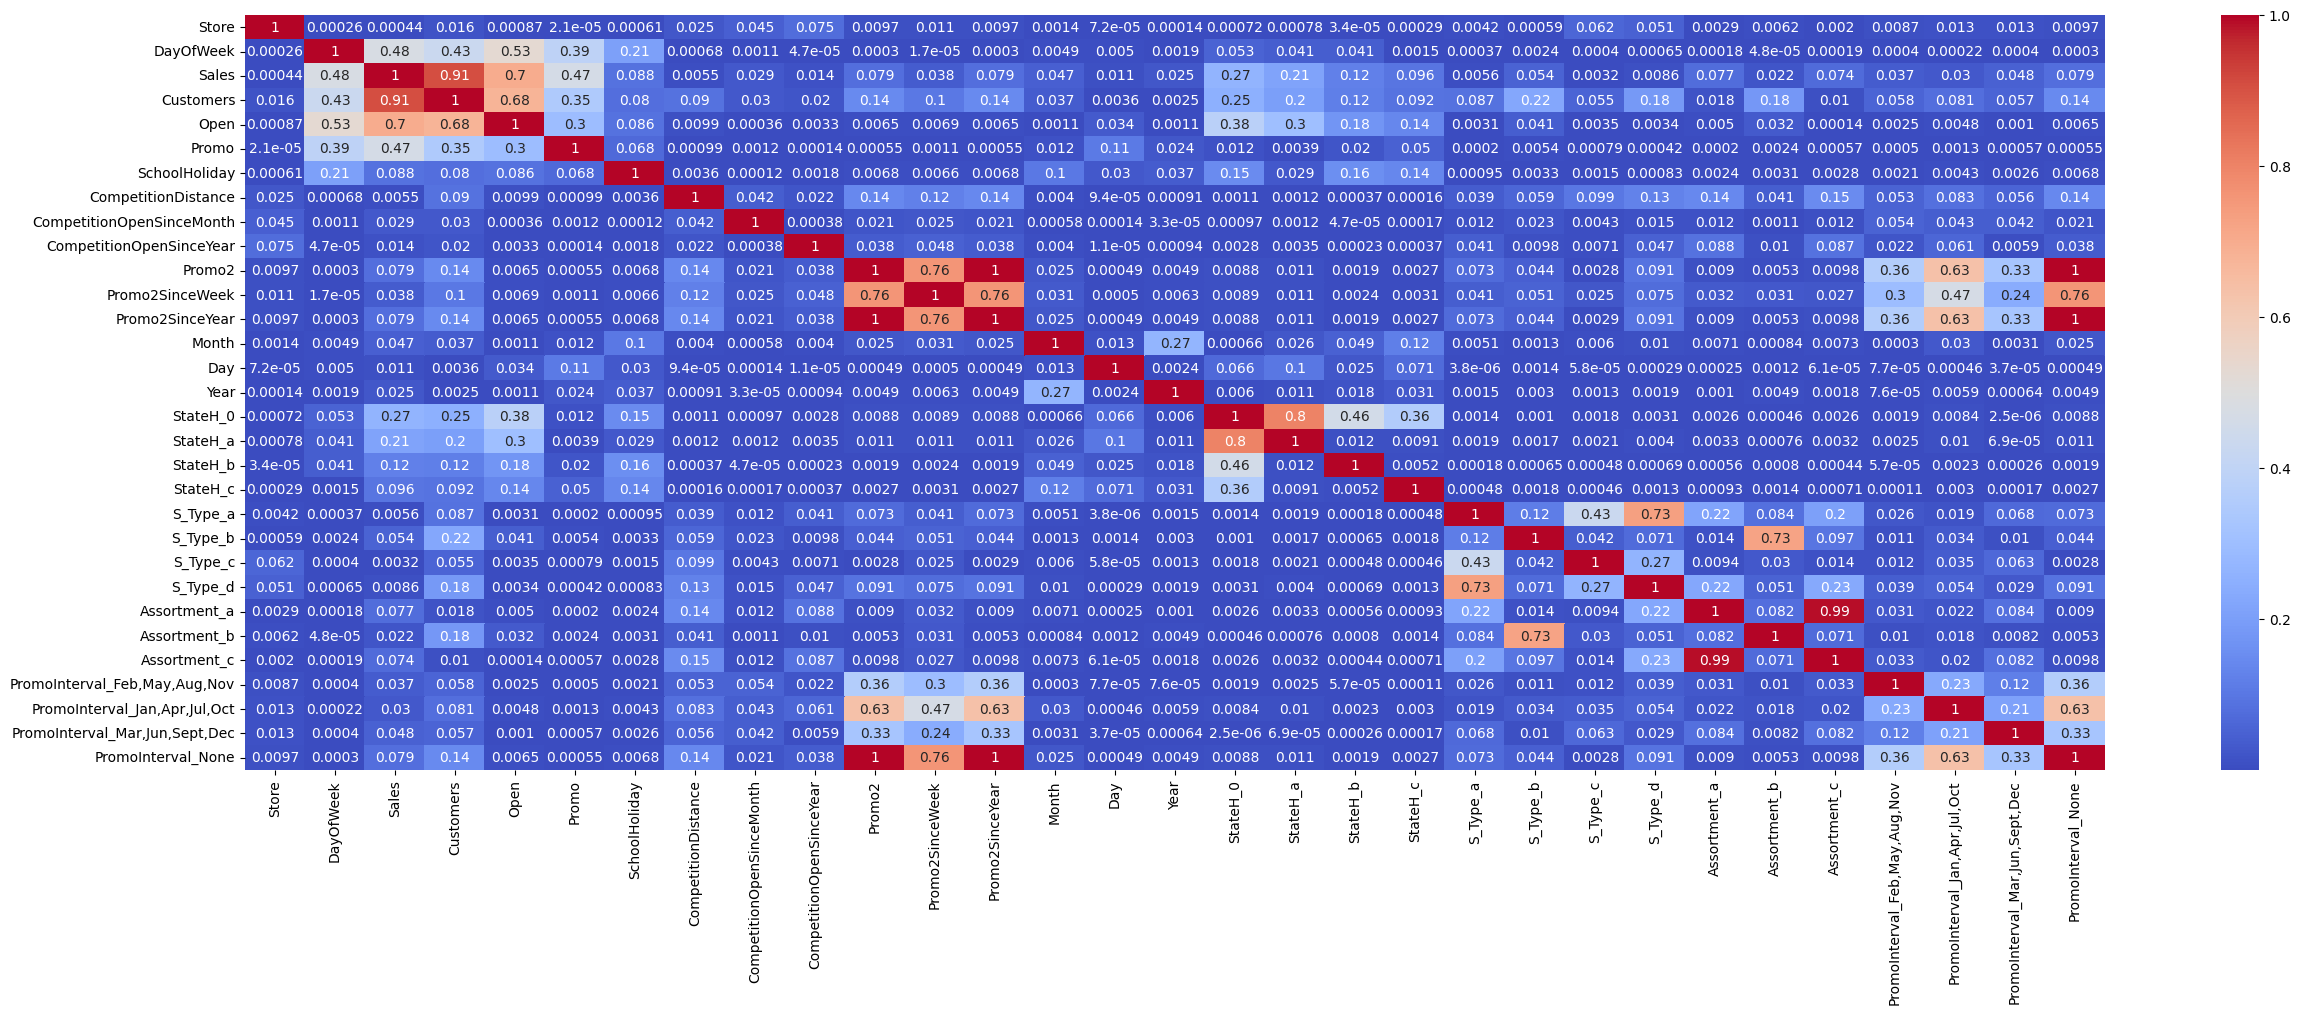

In [ ]:
#a heatmap would help us to get a overview of correlation condition
plt.figure(figsize=(30,10))

correlation=df1.corr()

sns.heatmap(abs(correlation),annot=True,cmap="coolwarm")

We can see there's quite a few instances of multicolinearity in the dataset, which requires to be handled.

1. We can start by taking away features by guestimates.

For instance, assortment b and store type b as mentioned before have negligible count

In [ ]:
feature_to_remove=['Assortment_b','S_Type_b']

2. Following features have extremely low correaltion with sales:
  
Store, Stateh_0 and store type c, Promo 2, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear,Promo2SinceWeek, Day, S_type_d, Promo_interval_Jan_april_jul_oct
  
Let's add these to the dump as well

In [ ]:
feature_to_remove=['Store','Assortment_b','S_Type_b','S_type_c','StateH_0','S_Type_c','Promo2','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Day','S_Type_d','PromoInterval_Jan,Apr,Jul,Oct','Sales','Promo2SinceYear','Promointerval_None','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec','S_Type_a','Date']

3. 'Assortment a' and 'Assortment c' have high correlation and 'Assortment a' has better correlation with sales so we will omit 'Assortment c'

In [ ]:
feature_to_remove.append('Assortment_c')

As for the features left out, let's use VIF to detect multicolinearity and further trim down our list prospects.

Let's keep a filter of VIF=10

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#defining function to calculate VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in (feature_to_remove)] ] )

variables        VIF
0            DayOfWeek   8.610265
1            Customers   6.523699
2                 Open  14.806728
3                Promo   2.015548
4        SchoolHoliday   1.346787
5                Month   4.212478
6                 Year  32.964687
7             StateH_a   1.228510
8             StateH_b   1.120458
9             StateH_c   1.076506
10        Assortment_a   2.128742
11  PromoInterval_None   2.070021

4. Year has high VIF. Let's remove that.

In [ ]:
feature_to_remove.append('Year')

In [ ]:
calc_vif(df1[[i for i in df1.describe().columns if i not in (feature_to_remove)] ] )

variables       VIF
0            DayOfWeek  3.220092
1            Customers  6.523467
2                 Open  8.630152
3                Promo  1.924532
4        SchoolHoliday  1.337245
5                Month  3.819888
6             StateH_a  1.071666
7             StateH_b  1.062499
8             StateH_c  1.061381
9         Assortment_a  2.052489
10  PromoInterval_None  2.019541

Looks good now. The features present here aren't much correalated to each other.

In [ ]:
feature_to_remove

['Store',
 'Assortment_b',
 'S_Type_b',
 'S_type_c',
 'StateH_0',
 'S_Type_c',
 'Promo2',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Day',
 'S_Type_d',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'Sales',
 'Promo2SinceYear',
 'Promointerval_None',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'S_Type_a',
 'Date',
 'Assortment_c',
 'Year']

In [ ]:
final_features=[i for i in df1.columns if i not in feature_to_remove]
final_features

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Month',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'Assortment_a',
 'PromoInterval_None']

So we finally have 11 features in our model.
Let's look into correaltion heatmap of these features.

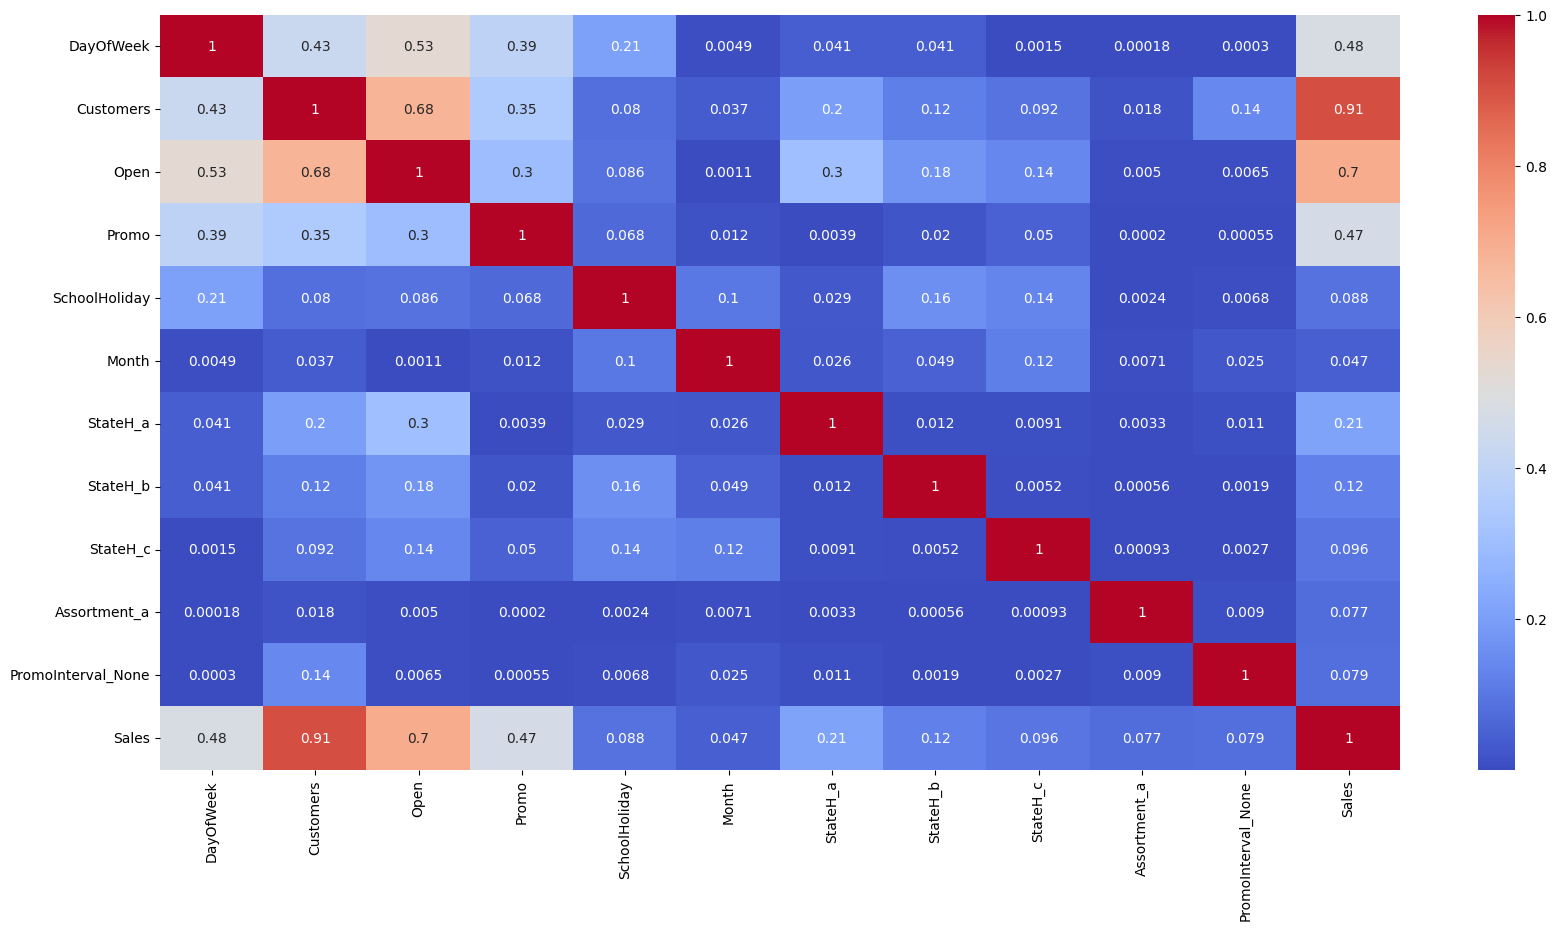

In [ ]:
plt.figure(figsize=(20,10))
final_features.append('Sales') #to look into the correlation
correlation=df1[final_features].corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

As we can see here, we have been able to select variables decently corelated with Sales (Min Corr: 0.05, Max corr: 0.89), and there isn't serious instance of multicolinearity.

In [ ]:
final_features=[i for i in df1.columns if i not in feature_to_remove]
final_features

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Month',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'Assortment_a',
 'PromoInterval_None']

#**EDA Conclusions and Hypotheses Validation:**

* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays. But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis. The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

##Model Implimentation

##Target feature conditioning.

Let's look into our target feature: Sales

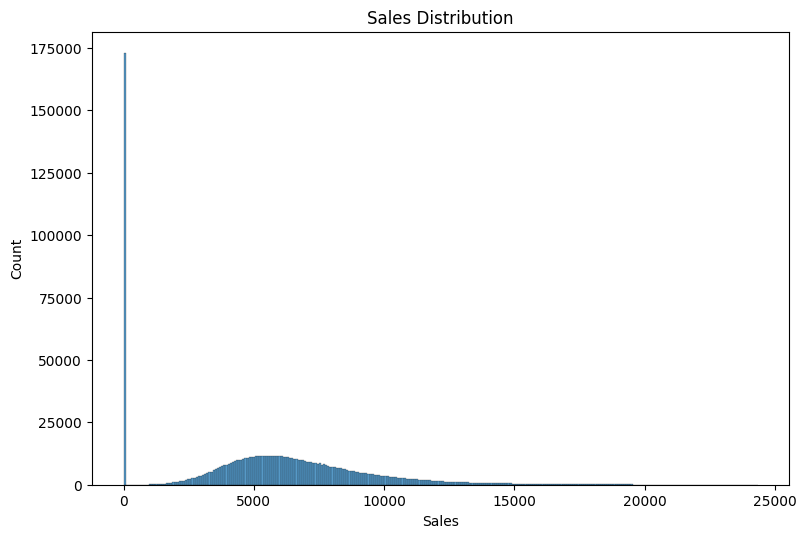

In [ ]:
#Let's look at the distribution of our dependent variable first

plt.figure(figsize=(9,6))
plt.title('Sales Distribution')
sns.histplot(df1['Sales'])

We see a peak at 0, which is due to days that stores were closed on.

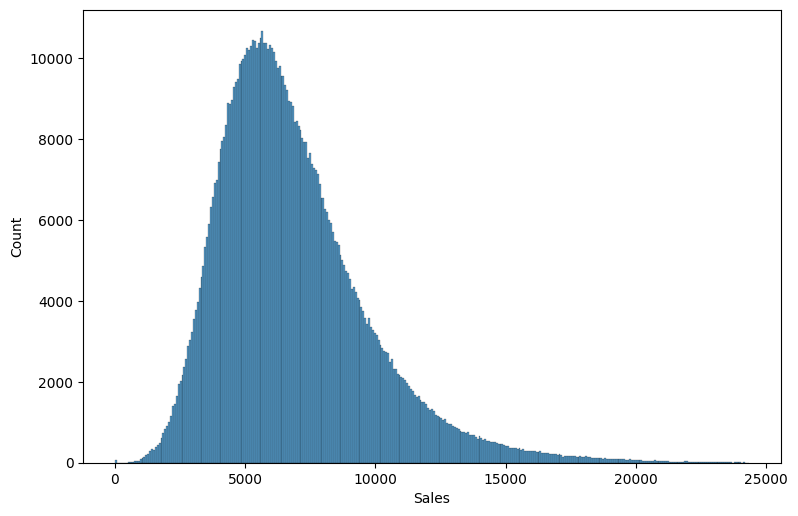

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(df[df1.Open==1]['Sales'])

This looks skewed slightly to the right. Square root transformation might help with that.

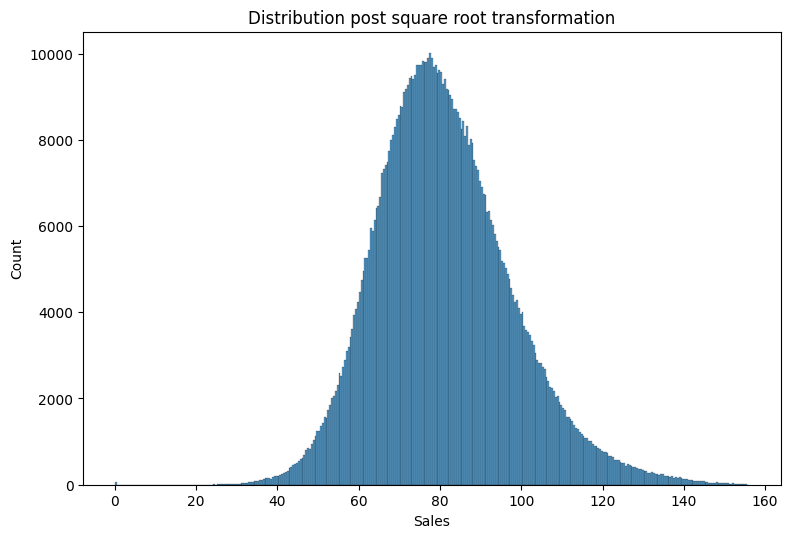

In [ ]:
#applying square root transformation
plt.figure(figsize=(9,6))
plt.title('Distribution post square root transformation')
sns.histplot(np.sqrt(df[df1.Open==1]['Sales']))

This distribution resembles a gaussian one much more closely now. 

###Data Prepping

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df1[final_features]
Y=np.sqrt(df1['Sales'])  #to normalise the distribution

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42) #loading train and test data.  Along with answer to The life, The Universe and Everything :)

In [ ]:
print('X train shape:',x_train.shape)
print('Y train shape:',y_train.shape)
print('X test shape:',x_test.shape)
print('Y test shape:',y_test.shape)

X train shape: (706967, 11)
Y train shape: (706967,)
X test shape: (302986, 11)
Y test shape: (302986,)


In [ ]:
#scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train) #Fitting linear regression

In [ ]:
reg.score(x_train,y_train) #checking regression score on training set

0.9460073610091255

In [ ]:
y_pred=reg.predict(x_test) #predictinng on test set

In [ ]:
#computing MSE and RMSE

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2,(y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2012959.1557506437
RMSE : 1418.787917819518


In [ ]:
#Computing R2 score
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)#squaring since I had applied square root transformation on Sales
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.8521821201386862
Adjusted R2 :  0.8521767533524984


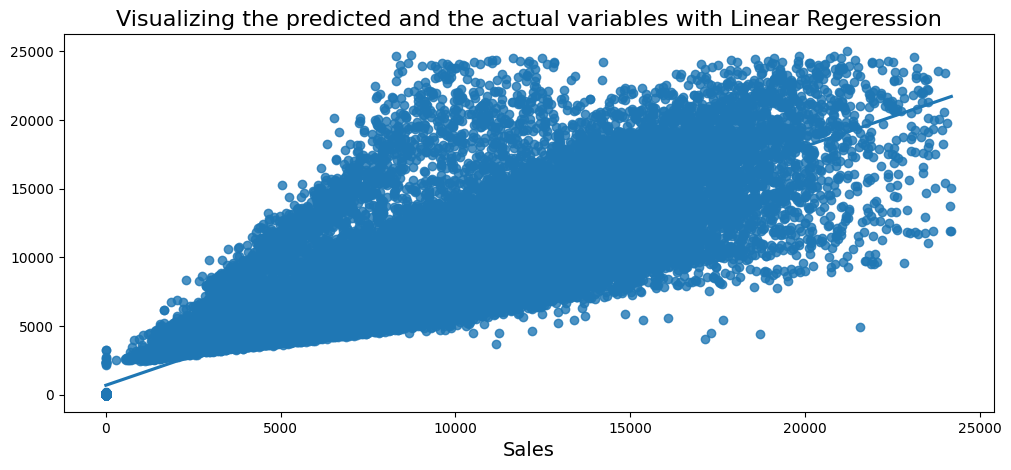

In [ ]:
#plotting training dataset
plt.figure(figsize=(12, 5))
sns.regplot(x=y_test**2, y=y_pred**2)#squaring since I had applied square root transformation on Sales
plt.xticks
plt.title('Visualizing the predicted and the actual variables with Linear Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

As we see, linear Regression did pretty decent.
Let's see if regularization works.

###Lasso Regularization

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=1e-05 , max_iter= 5000)

lasso.fit(x_train, y_train)

Lasso(alpha=1e-05, max_iter=5000)

In [ ]:
lasso.score(x_train, y_train) 

0.9460073610083504

In [ ]:
y_pred_l = lasso.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_l)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_l)**2)#squaring since I had applied square root transformation on Sales
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_l)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2012959.3853560162
RMSE : 1418.7879987355461
R2 : 0.8521821032780463
Adjusted R2 :  0.8521767364912464


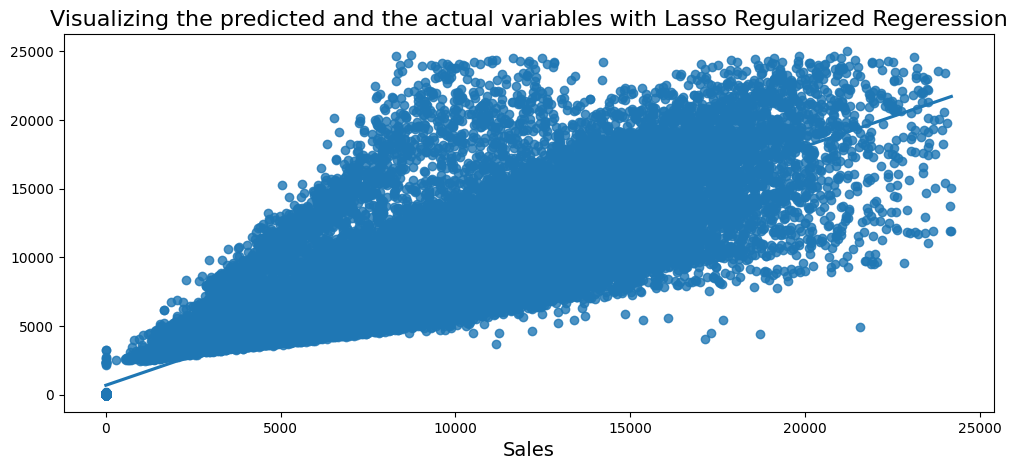

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_l)**2)
plt.title('Visualizing the predicted and the actual variables with Lasso Regularized Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#  Cross validation
# lasso = Lasso(max_iter=4000)
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# lasso_regressor.fit(x_train, y_train)

#Grid Search for lasso regualrization is not getting converged. Keepikng in mind the computation time, we'll skip this

So no, Lasso hasn't been able to bring about any development in model performance  even after hyperparameter tuning. 

Let's look at Ridge Regularization

###Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1e-05,max_iter=5000)
ridge.fit(x_train,y_train)

Ridge(alpha=1e-05, max_iter=5000)

In [ ]:
ridge.score(x_train,y_train)

0.9460073610091255

In [ ]:
y_pred_ridge=ridge.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_l)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2012959.1557428336
RMSE : 1418.7879178167657
R2 : 0.8521821201392598
Adjusted R2 :  0.8521767364912464


Implementing GridSearch 

In [ ]:
#Cross Validation and hyper parameter tuning
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=4)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(alpha=1e-05, max_iter=5000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -62.882502024781665


In [ ]:
y_pred_ridge_cv=ridge_regressor.predict(x_test)

In [ ]:
MSE  = mean_squared_error ( (y_test)**2, (y_pred_ridge_cv)**2 )
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge_cv)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_ridge_cv)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2012955.238210263
RMSE : 1418.7865372247734
R2 : 0.8521824078159159
Adjusted R2 :  0.8521770410401727


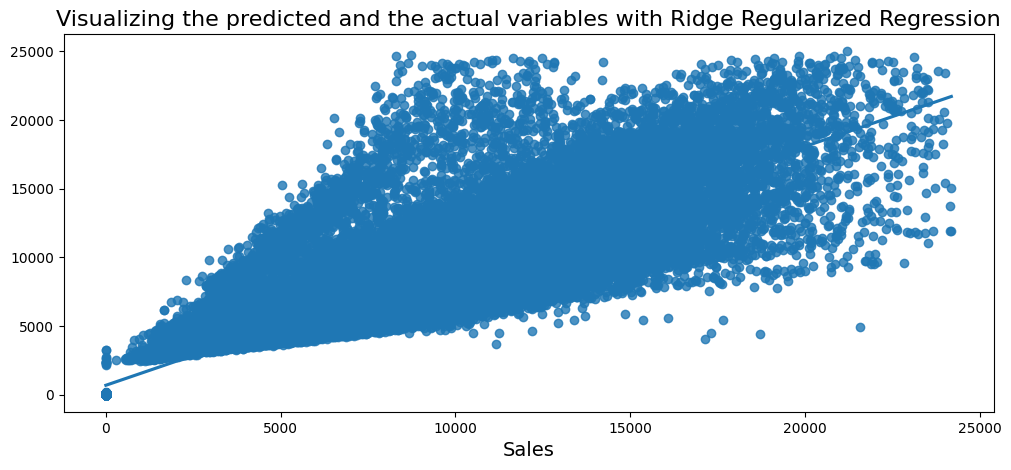

In [ ]:
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_ridge)**2)
plt.title('Visualizing the predicted and the actual variables with Ridge Regularized Regression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

There isn't much notable improvement upon implementing lasso and ridge regualrization even after hypertuning the parameters.

Which may indicate that the model isn't suffering from overfit afterall.

###Elastic Net Regularization


In [ ]:
from sklearn.linear_model import  ElasticNet
elasticnet=ElasticNet(alpha=1,l1_ratio=0.4)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=1, l1_ratio=0.4)

In [ ]:
elasticnet.score(x_train,y_train)

0.8859751741094926

In [ ]:
y_pred_elastic=elasticnet.predict(x_test)

In [ ]:
MSE  = mean_squared_error ( (y_test)**2, (y_pred_elastic)**2 )
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_elastic)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2733380.0431840825
RMSE : 1653.2936953802498
R2 : 0.7992793635755477
Adjusted R2 :  0.7992720760624256


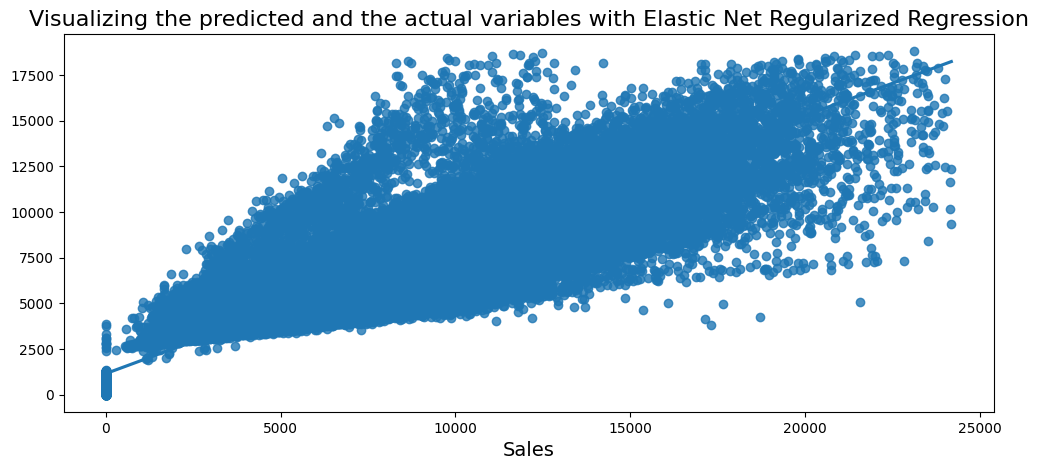

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_elastic)**2)
plt.title('Visualizing the predicted and the actual variables with Elastic Net Regularized Regression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

Elastic Net hasn't helped much either.

###Random Forest Regressor

In [ ]:
#libraries required for random forest model
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
#implementing the model
rf_reg = RandomForestRegressor(random_state=42)
#training the model
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_reg.score(x_train,y_train)

0.9828782973819454

In [ ]:
#defining the predicted variable
y_pred_rf = rf_reg.predict(x_test)

In [ ]:
MSE  = mean_squared_error ( (y_test)**2, (y_pred_rf)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_rf)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_rf)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1920167.1449381844
RMSE : 1385.700957976931
R2 : 0.8589961274011688
Adjusted R2 :  0.8589910080094105


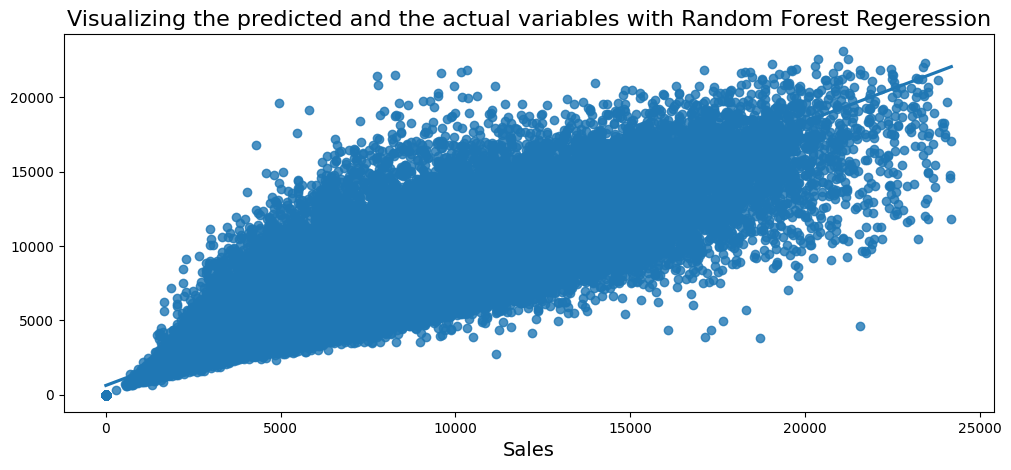

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_rf)**2)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

Random Forest by far has performed the best.

In [ ]:
feature_importance=pd.DataFrame(list(zip(final_features,rf_reg.feature_importances_)))

In [ ]:
feature_importance[1]

0     0.006239
1     0.968451
2     0.000000
3     0.009836
4     0.001704
5     0.009213
6     0.000055
7     0.000011
8     0.000006
9     0.002582
10    0.001905
Name: 1, dtype: float64

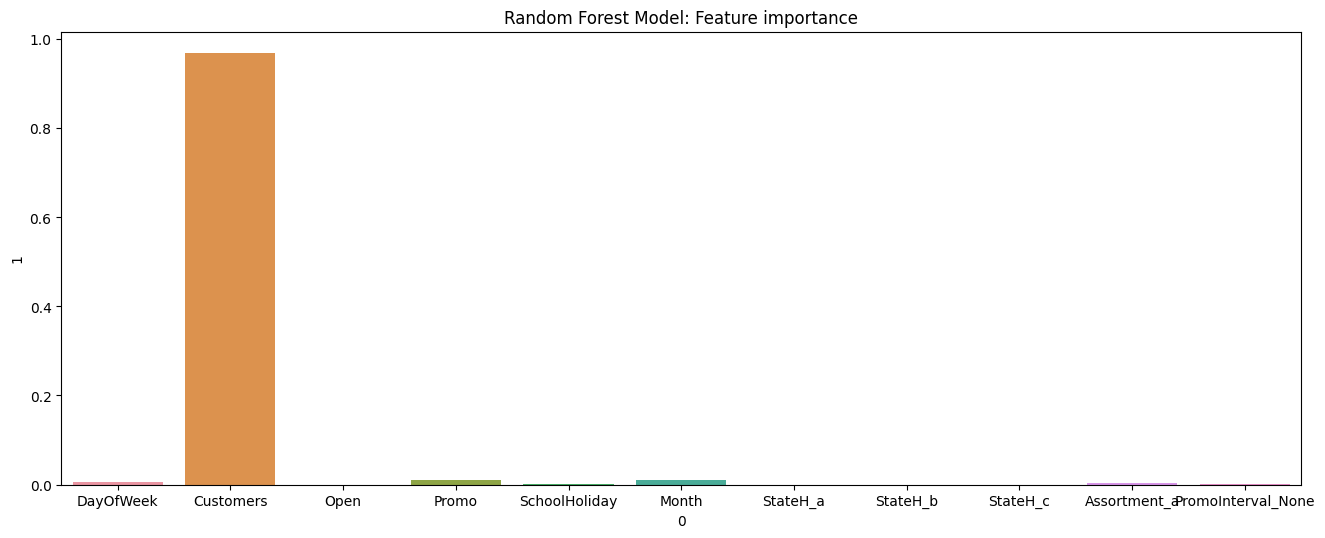

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Random Forest Model: Feature importance')
sns.barplot(x=feature_importance[0],y=feature_importance[1])
plt.show()

### Regression: Summary

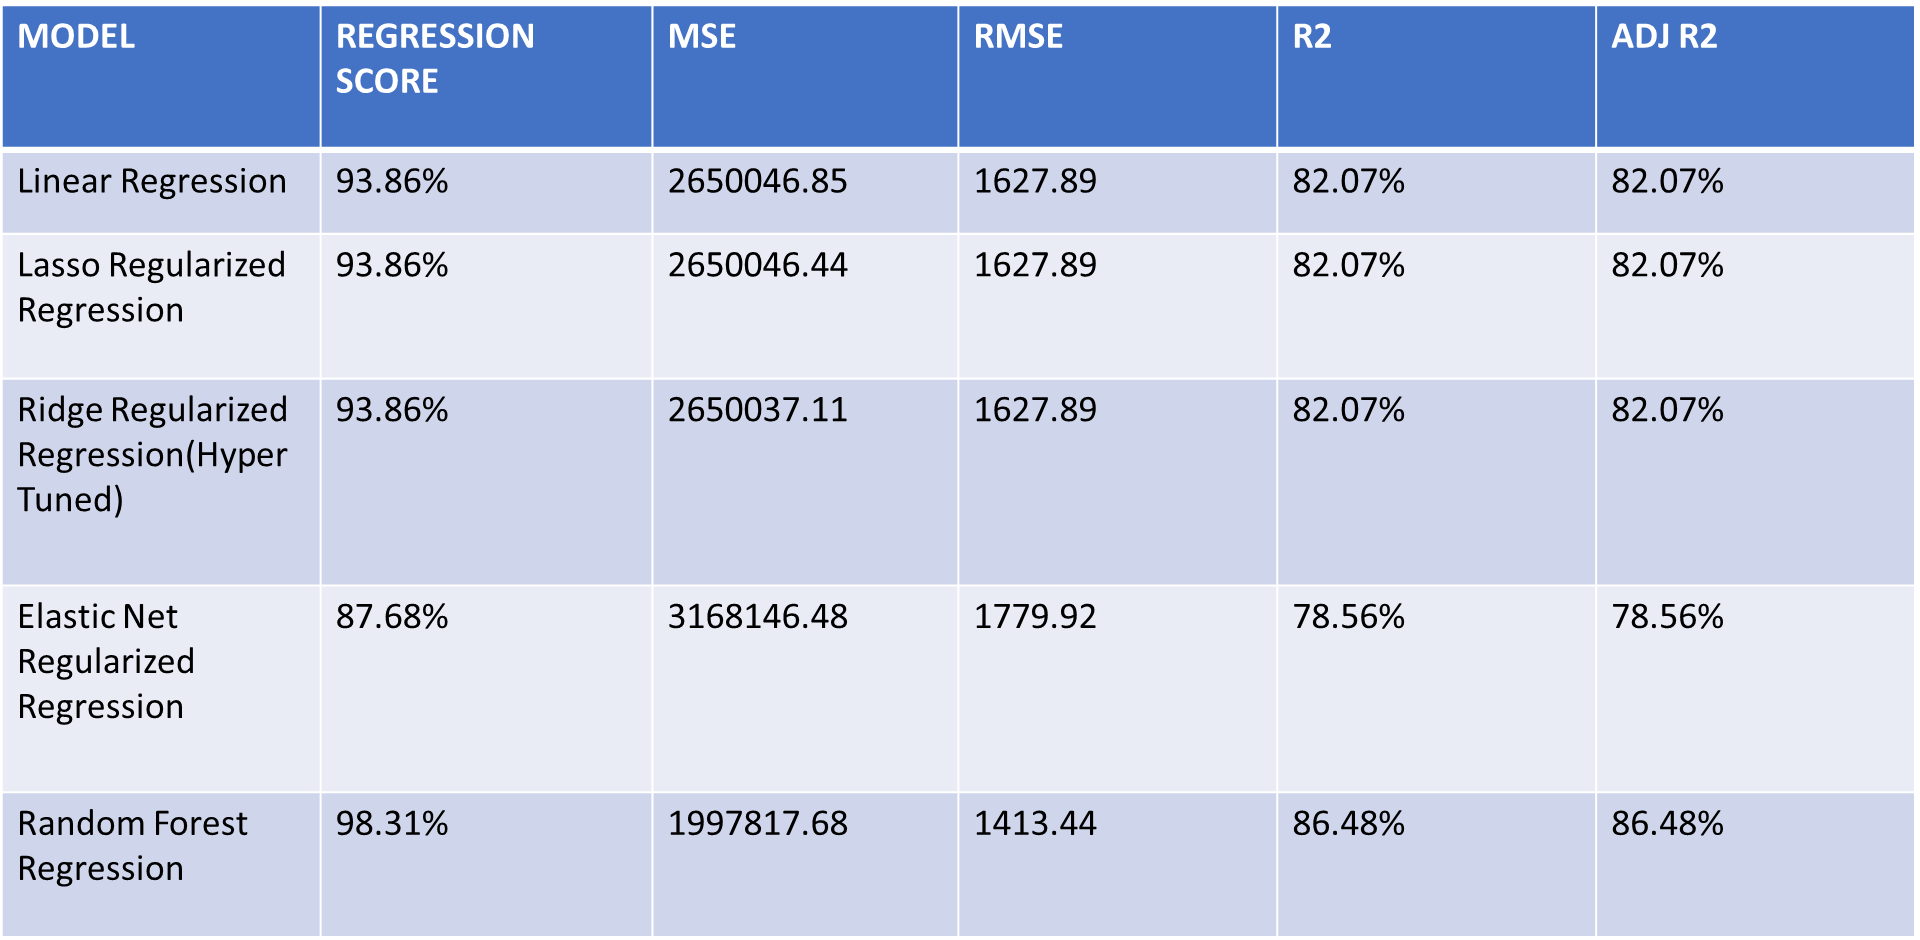




Random Forest Regression has churned out the best results.

###Predictions and Actual Values


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
dfn=pd.DataFrame(x_test).reset_index()
dfn.drop('index',axis=1,inplace=True)
dfn.columns=final_features
dfn['prediction'] = y_pred_rf
dfn['actual']=y_test.reset_index()['Sales']

In [ ]:
dfn

DayOfWeek  Customers  Open  Promo  SchoolHoliday  Month  StateH_a  \
0               4        369     1      0              1      5         0   
1               5        849     1      1              0     11         0   
2               1       1863     1      1              0      5         0   
3               6        254     1      0              0      6         0   
4               6        519     1      0              0      6         0   
...           ...        ...   ...    ...            ...    ...       ...   
302981          2       1247     1      0              1      3         0   
302982          6        489     1      0              0      3         0   
302983          5       1243     1      1              0      3         0   
302984          6        614     1      0              0      3         0   
302985          2        781     1      1              0      3         0   

        StateH_b  StateH_c  Assortment_a  PromoInterval_None  prediction  \
0              0         0             0                   0   67.495212   
1              0         0             0                   1   97.484066   
2              0         0             1                   1  127.021339   
3              0         0             1                   1   46.181531   
4              0         0             0                   0   75.300878   
...          ...       ...           ...                 ...         ...   
302981         0         0             0                   1   96.639957   
302982         0         0             1                   0   71.387711   
302983         0         0             1                   1  100.782370   
302984         0         0             1                   1   73.295348   
302985         0         0             1                   0   87.470555   

            actual  
0        62.169124  
1       102.049008  
2       119.607692  
3        48.176758  
4        63.733821  
...            ...  
302981   96.472794  
302982   72.759879  
302983  105.905618  
302984   60.530984  
302985   95.456797  

[302986 rows x 13 columns]

Note: I've done square root transformaltion on the target variables here. So the results have to squared to arrive at actual values.

In [ ]:
dfn['prediction']=dfn['prediction']**2
dfn['actual']=dfn['actual']**2

In [ ]:
dfn

DayOfWeek  Customers  Open  Promo  SchoolHoliday  Month  StateH_a  \
0               4        369     1      0              1      5         0   
1               5        849     1      1              0     11         0   
2               1       1863     1      1              0      5         0   
3               6        254     1      0              0      6         0   
4               6        519     1      0              0      6         0   
...           ...        ...   ...    ...            ...    ...       ...   
302981          2       1247     1      0              1      3         0   
302982          6        489     1      0              0      3         0   
302983          5       1243     1      1              0      3         0   
302984          6        614     1      0              0      3         0   
302985          2        781     1      1              0      3         0   

        StateH_b  StateH_c  Assortment_a  PromoInterval_None    prediction  \
0              0         0             0                   0   4555.603616   
1              0         0             0                   1   9503.143053   
2              0         0             1                   1  16134.420499   
3              0         0             1                   1   2132.733800   
4              0         0             0                   0   5670.222157   
...          ...       ...           ...                 ...           ...   
302981         0         0             0                   1   9339.281215   
302982         0         0             1                   0   5096.205331   
302983         0         0             1                   1  10157.086094   
302984         0         0             1                   1   5372.208044   
302985         0         0             1                   0   7651.098042   

         actual  
0        3865.0  
1       10414.0  
2       14306.0  
3        2321.0  
4        4062.0  
...         ...  
302981   9307.0  
302982   5294.0  
302983  11216.0  
302984   3664.0  
302985   9112.0  

[302986 rows x 13 columns]

###Disadvantage of the model

Although we have been able to predict the sales with decent accuracy there is an obvious flaw associated with the model: We need to know number of customers, in order for us to predict sales. :/. I know. Sounds dumb. If we had knowledge of number of customers walkig in tomorrow, we wouldn't even need a machine learning model, just multiplying avg sales per customer with number of customer would render us decent accuracy.

To show you the severity of it, let me show you how the model accuracy drops just by reoving Customer field from the features.


In [ ]:
final_features=[i for i in final_features if i not in ['Customers']]
final_features

['DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Month',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'Assortment_a',
 'PromoInterval_None']

In [ ]:
X=df1[final_features]
Y=np.sqrt(df1['Sales'])  #to normalise the distribution

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42) #loading train and test data along with answer to The life, the Universe and everything

In [ ]:
#implementing the model
rf_reg_2 = RandomForestRegressor(random_state=42)
#training the model
rf_reg_2.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_reg_2.score(x_train,y_train) #checking regression score.

0.8555934788316317

In [ ]:
y_pred= rf_reg_2.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 5109861.200617432
RMSE : 2260.500210267062
R2 : 0.6247669273849773
Adjusted R2 :  0.6247545424333273


So we can see, that even our most efficient Random Forest Regressor has failed miserably.

There are a few solution to the problem here:

1. We can design a model to predict the number of customers on a specific day using the other features, and feed that number to the model. This definitely will create a gap, but is more practical than the model designed here.

2. Use time series analysis to forecast sales.



#Alternative Regression Model

The idea here is to design a model to predict the number of customers, since that's not something that we'll be provided with in a real world scenario.
We'll then feed this predicted customer values to the sales forecast model.

Let's try to predict number of customers

In [ ]:
customer_pred_feature=[i for i in df1.columns if i not in['Sales','Customers','Date','Year']]
customer_pred_feature

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Month',
 'Day',
 'StateH_0',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'S_Type_a',
 'S_Type_b',
 'S_Type_c',
 'S_Type_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoInterval_None']

In [ ]:
X=df1[customer_pred_feature]
y=np.sqrt(df1['Customers'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
x_train

Store  DayOfWeek  Open  Promo  SchoolHoliday  CompetitionDistance  \
886870    973          2     1      1              0                330.0   
763517    838          3     1      0              1               6890.0   
217195    240          6     1      0              0               1110.0   
514329    564          6     1      0              0               6540.0   
595864    654          2     1      1              0               6930.0   
...       ...        ...   ...    ...            ...                  ...   
260683    288          1     1      0              0                800.0   
367933    403          4     1      1              0               4970.0   
131953    146          3     1      1              0               8050.0   
675539    742          4     1      1              1               4380.0   
121979    134          6     1      0              0               1200.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
886870                        9.0                    2012.0       1   
763517                        9.0                    2012.0       1   
217195                        5.0                    2009.0       0   
514329                        9.0                    2012.0       1   
595864                        9.0                    2006.0       0   
...                           ...                       ...     ...   
260683                        4.0                    2007.0       1   
367933                        7.0                    2015.0       0   
131953                       10.0                    1961.0       1   
675539                        9.0                    2012.0       0   
121979                        9.0                    2008.0       0   

        Promo2SinceWeek  ...  S_Type_b  S_Type_c  S_Type_d  Assortment_a  \
886870             28.0  ...         0         0         1             0   
763517             48.0  ...         0         0         1             0   
217195              0.0  ...         0         0         0             1   
514329             14.0  ...         0         0         1             0   
595864              0.0  ...         0         1         0             1   
...                 ...  ...       ...       ...       ...           ...   
260683             14.0  ...         0         0         1             1   
367933              0.0  ...         0         0         0             1   
131953             48.0  ...         0         0         1             0   
675539              0.0  ...         0         0         1             0   
121979              0.0  ...         0         0         0             1   

        Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
886870             0             1                              0   
763517             0             1                              0   
217195             0             0                              0   
514329             0             1                              0   
595864             0             0                              0   
...              ...           ...                            ...   
260683             0             0                              0   
367933             0             0                              0   
131953             0             1                              0   
675539             0             1                              0   
121979             0             0                              0   

        PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
886870                              1                               0   
763517                              0                               1   
217195                              0                               0   
514329                              1                               0   
595864                              0                               0   
...                               ...             

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#implementing the model
random_forest_customer_reg = RandomForestRegressor(random_state=42)
#training the model
random_forest_customer_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
random_forest_customer_reg.score(x_train,y_train) 

0.9977780072638722

In [ ]:
y_pred_customers=random_forest_customer_reg.predict(x_test)

In [ ]:
y_test

175245    19.209373
288371    29.137605
393733    43.162484
541895    15.937377
54714     22.781571
            ...    
378929    35.312887
681166    22.113344
617847    35.256205
543513    24.779023
721334    27.946377
Name: Customers, Length: 302986, dtype: float64

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_customers)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_customers)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_customers)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 6733.836321574606
RMSE : 82.05995565179526
R2 : 0.9605907984213927
Adjusted R2 :  0.9605871561300966


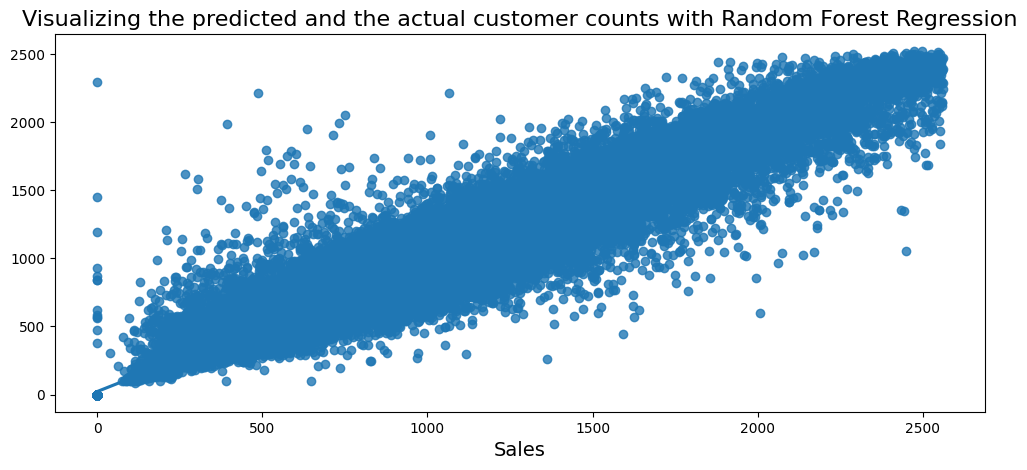

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_customers)**2)
plt.title('Visualizing the predicted and the actual customer counts with Random Forest Regression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

Now we have predicted the number of customers a store should expect at any given day, with quite an appreciable accuracy.
Now let's run the model with the predicted customer values.

We'll use the same set of features we used for linear regression previously. But Replace the customer column with values predicted by our new model

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
df2=df1.copy() #this new dataset would have predicted customer values
df2.drop('Customers',axis=1,inplace=True)#to replace with predicted customer values
df2['Customers']=pd.DataFrame((random_forest_customer_reg.predict(X))**2)

In [ ]:
df2

Running regression model to predict sales, with predicted customer value

In [ ]:
final_features=[i for i in df1.columns if i not in feature_to_remove]
final_features

In [ ]:
X=df2[final_features]
Y=np.sqrt(df2['Sales'])  #to normalise the distribution

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42) #loading train and test data.  Along with answer to The life, The Universe and Everything :)

In [ ]:
x_train

In [ ]:
#scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#implementing the model
random_forest_new = RandomForestRegressor(random_state=42) #I'm running out of creativity to name these models. Bare with me :/
#training the model
random_forest_new.fit(x_train, y_train)

In [ ]:
random_forest_new.score(x_train,y_train)

In [ ]:
y_pred_new=random_forest_new.predict(x_test)  

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_new)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_new)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_new)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

Even though the performance has gone down from previous model, it still remains a more practical approach.

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test)**2, (y_pred_new)**2)
plt.title('Visualizing the predicted and the actual sales counts with predicted customer values', size=16)
plt.xlabel('Sales', size=14)
plt.show()

#Time Series Analysis: Facebook Prophet.


Props to AIEngineering youtube channel to help me understand functioning of facebook prophet. 
Channel Link: [AIEngineering](https://www.youtube.com/channel/UCwBs8TLOogwyGd0GxHCp-Dw)

Facebook prophet essentially learns the trend in the data to forecast future events. So all I'll use here is date and average sales made on those days. 

##Data Prepping

I'll choose the average sales per day as the target variable here.

In [ ]:
daily_sales_df=df[df.Open!=0].groupby('Date')['Sales'].mean().reset_index() #Let's ommit the days when the stores were'nt open
daily_sales_df

In [ ]:
#Prophet requires the time stamp column to be named as ds and target feature as y

daily_sales_df.columns=['ds','y']
daily_sales_df

In [ ]:
#let's plot the average sales over the time
plt.figure(figsize=(25,6))
plt.title('Sales trend over the time')
plt.plot(daily_sales_df.ds,daily_sales_df.y)

We can observe presence of a pattern/trend in the dataset.

In [ ]:
from fbprophet import Prophet #importing prophet

In [ ]:
#let's split our test and train data. Since we are required to predict the sales for 6 weeks/ 42 days, let's keep those 42 days in test data, and rest in training dataset.
train=daily_sales_df[0:900]
test=daily_sales_df[900:943]

##Training Prophet Model

In [ ]:
#calling prophet
model=Prophet(interval_width=0.95) # specifying the confidence interval to be 95%

In [ ]:
#training the model
model.fit(train)

In [ ]:
model.params #model parameters

##Forecasting

In [ ]:
#let's create a dataframe containing the future dates to predict upon
future=model.make_future_dataframe(periods=42,freq='D') #Since we need to predict for next six weeks
future #this is our training dataset extended with 42 more days

In [ ]:
forecast=model.predict(future) #making the predictions
forecast[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
#Let's plot our predicted and actual sales
plt.figure(figsize=(20,6))
plt.plot(daily_sales_df.y)
plt.plot(forecast.yhat)

Blue line represents the actual and orange line represents the predicted values.

We see that although the forecast model has been able imitate the trend of sales to an extend, it hasn't been able to accomodate the peaks caused by outliers in the dataset. This can be accomodated by the confidence interval

In [ ]:
#Let's plot the actual and predicted values with the confidence interval
model.plot(forecast)

The black points are the actual values, the blue lines the predicted values and the light blue region is the coverage of confidence interval.
Most of the points have been accounted for, by taking the confidence interval into consideration.

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig=plot_plotly(model,forecast)
py.iplot(fig)

You can use this to look into specific periods by adjusting the time frame below the chart



##Diagnosis of the Model

In [ ]:
#Doing cross validation
from fbprophet.diagnostics import cross_validation
cv_results=cross_validation(model=model, horizon='42 days') #since our forecast horizon according to problem statement is 42 days. It will run 942/42 = approx 24 forecasts and average them out.

In [ ]:
cv_results

In [ ]:
#printing performance metrics
from fbprophet.diagnostics import performance_metrics
df_p= performance_metrics(cv_results)
df_p


In [ ]:
#ploting mape across the forecast. 
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='mape')


We see the model has been able to consistently maintain the mape below 20%. Which is an acceptable performance.

##Summary

1. Prophet has done pretty well, considering the fact that it has only used past daily sales data to forecast the sales. 

2. Model efficacy can be improved much more by performing multivariate analysis using prophet.

3. Prophet has provision to take into account the promotions and holiday sales. Doing this might improve model accuracy as well.